<center><br> <img src="https://www.iscte-iul.pt/assets/images/logo_iscte_detailed.svg" style="width: 200px;"></center><br>

<img src="https://i.pinimg.com/originals/2f/63/0c/2f630c8ff0e603d2b159c169d368b7d0.jpg" style="width: 250px;margin-top: 30px;" align="left">
   <div><center><h1>PACD1: Limpeza dos Jogadores</h1></center></div>
   <div><center><h3>Projeto Aplicado para Ciência de Dados I</h3></center></div>
   <div><center><b>Docentes:</b> Diana Mendes <b>|</b> Sérgio Moro</center></div>
 <br>
    <div><center><h4>Grupo 2</h4></center></div>
    <div><center> André Silvestre Nº104532 <b>|</b> Diogo Catarino Nº104745</center></div>
    <div><center>Francisco Gomes Nº104944 <b> |</b> Rita Matos Nº104936 </center></div>
    <div><center><b>CDB1</b></center>
 <br>    
 <br>


<div style="background: linear-gradient(to right,#67C7ED, #0371B1,#0A6394); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

# Índice do Nobebook


<ol style="list-style-type: upper-roman;font-weight: bold;">
  <li><span style = "font-weight: normal;"><a href="#29">2.9 | Variáveis PlayerName, LinkPlayer e Opponent</a></span></li>
  <li><span style = "font-weight: normal;"><a href="#210">2.10 | Variável Born</a></span></li>
  <li><span style = "font-weight: normal;"><a href="#211">2.11 | Variável Hand</a></span></li>
  <li><span style = "font-weight: normal;"><a href="#212">2.12 | Variável Height</a></span></li>
  <li><span style = "font-weight: normal;"><a href="#213">2.13 | Variável Birthdate</a></span></li>
  <li><span style = "font-weight: normal;"><a href="#999">EXTRA | GameRank</a></span></li>

</ol>

<div style="background: linear-gradient(to right,#67C7ED, #0371B1,#0A6394); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>


# 
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#67C7ED, #0371B1,#0A6394); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>2 | Data Preparation (Jogadores)</b></h1></center>
</div>

## 📚 Import das Bibliotecas

In [1]:
# ================= Bibliotecas que vamos usar no Projeto =================

## For data
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
    
## Plot style and warnings    
plt.style.use('ggplot')
from IPython.display import display # Allows the use of display() for DataFrames
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)  # Visualizar a informação toda

## 🧮 Importar Bases de Dados Apenas com Jogos ocorridos na Suécia (.csv)

In [2]:
atp_suecia = pd.read_csv('atp_suecia.csv')
atp_suecia.head(2)

,PlayerName,LinkPlayer,Born,Height,Hand,Opponent,GameRank,Tournament,Tournament_Start_Date,Tournament_End_Date,Prize,Ground,GameRound,WL,N_Sets
0,Rafael Nadal,https://www.atptour.com/en/players/rafael-nadal/n409/player-activity?year=all&matchType=Singles,"Manacor, Mallorca, Spain",185.0,"Left-Handed, Two-Handed Backhand",Joachim Johansson,690,Stockholm,2006-10-09,2006-10-15,1125038,Hard,Round of 16,L,2
1,Rafael Nadal,https://www.atptour.com/en/players/rafael-nadal/n409/player-activity?year=all&matchType=Singles,"Manacor, Mallorca, Spain",185.0,"Left-Handed, Two-Handed Backhand",Raemon Sluiter,90,Stockholm,2006-10-09,2006-10-15,1125038,Hard,Round of 32,W,2


In [3]:
# Informação sobre os dados (Tipo de dados e Número de observações não-nulas)
atp_suecia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PlayerName             11508 non-null  object 
 1   LinkPlayer             11508 non-null  object 
 2   Born                   9195 non-null   object 
 3   Height                 9283 non-null   float64
 4   Hand                   10144 non-null  object 
 5   Opponent               11508 non-null  object 
 6   GameRank               11508 non-null  object 
 7   Tournament             11508 non-null  object 
 8   Tournament_Start_Date  11508 non-null  object 
 9   Tournament_End_Date    11508 non-null  object 
 10  Prize                  11508 non-null  int64  
 11  Ground                 11508 non-null  object 
 12  GameRound              11508 non-null  object 
 13  WL                     11508 non-null  object 
 14  N_Sets                 11508 non-null  int64  
dtypes:

---

# <a class='anchor' id='29'></a>

<div style="border: 3px #0371B1; border-style: solid;  
            border-radius: 300px; padding: 20px;">
    <center><h1 style="margin-top: 2px;color: #0371B1; font-size: 20px;
                       font-family: 'Avenir Next LT Pro', sans-serif;"> 2.9 | Variáveis PlayerName, LinkPlayer e Opponent</h1></center>
</div>

In [4]:
# Contar os valores omissos na variável 'PlayerName', 'LinkPlayer' e 'Opponent'
print('Nº de Valores Omissos do PlayerName:',atp_suecia['PlayerName'].isna().sum(), '(', round(atp_suecia['PlayerName'].isna().sum()/len(atp_suecia['PlayerName']) * 100, 2) ,'%)' )
print('Nº de Valores Omissos do LinkPlayer:',atp_suecia['LinkPlayer'].isna().sum(), '(', round(atp_suecia['LinkPlayer'].isna().sum()/len(atp_suecia['LinkPlayer']) * 100, 2) ,'%)' )
print('Nº de Valores Omissos do Opponent:',atp_suecia['Opponent'].isna().sum(), '(', round(atp_suecia['Opponent'].isna().sum()/len(atp_suecia['Opponent']) * 100, 2) ,'%)' )

Nº de Valores Omissos do PlayerName: 0 ( 0.0 %)
Nº de Valores Omissos do LinkPlayer: 0 ( 0.0 %)
Nº de Valores Omissos do Opponent: 0 ( 0.0 %)


In [5]:
# Verificação do Nº de Jogadores e LinkPlayers distintos
print('Nº PlayerName Distinto:',atp_suecia['PlayerName'].nunique()) # 9953 nomes distintos na base de dados toda
print('Nº LinkPlayer Distinto:',atp_suecia['LinkPlayer'].nunique()) # 9960 links distintos na base de dados toda 

Nº PlayerName Distinto: 1455
Nº LinkPlayer Distinto: 1455


> **Nota:** Restringindo os jogos à Suécia, já não se coloca o problema de haver jogadores diferentes com nomes iguais

In [6]:
# Verificar o nº de nomes de Opponents distintos
print('Nº de Oponent Distinto:',atp_suecia['Opponent'].nunique())

Nº de Oponent Distinto: 1756


In [7]:
# Contagem de ocorrencias com 'bye'
atp_suecia['Opponent'][atp_suecia['Opponent'].str.contains("bye")].sum()

0

> Nem todos os **Oponentes** têm informações acerca de si. Vamos verificar o casos em que ocorrem e fazer uma lista com os *links* desses jogadores para fazer ***Web Scraping***

In [8]:
# Nº de Observações com oponentes em falta
len(atp_suecia.loc[~atp_suecia['Opponent'].isin(atp_suecia['PlayerName']), 'Opponent'])

864

In [9]:
# Ver os oponentes que não fazem parte dos 'PlayerName' (ou seja, não pertencem aos 500 melhores jogadores)
df_oponentes = pd.DataFrame(atp_suecia.loc[~atp_suecia['Opponent'].isin(atp_suecia['PlayerName']), 'Opponent'].unique())
df_oponentes

,0
0,Tomas Berdych
1,Carlos Berlocq
2,David Ferrer
3,Edvin Gustafsson
4,Marcos Baghdatis
...,...
308,Erik Nordblom
309,Esteban Bruna
310,Johan Ljungdahl
311,Axel Lagerlof


In [10]:
# Guardar os links a pesquisar
df_oponentes.to_csv("Links_Oponentes.csv", sep=";")

---

## ⛓️Links dos Oponentes

In [11]:
# Lista com os links dos jogadores oponentes sem informação
opponents_links = [ 
    "https://www.atptour.com/en/players/tomas-berdych/ba47/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/carlos-berlocq/b884/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/david-ferrer/f401/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/edvin-gustafsson/ge49/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/marcos-baghdatis/b837/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/riccardo-bellotti/bh76/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/philip-moebius/mp51/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/tommy-haas/h355/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/linus-frost/f0as/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/daniel-svensson/sz01/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jonathan-stenberg/su61/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/robert-rasmussen/rh42/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/simon-birgerson/b0di/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/michal-przysiezny/p701/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/elliot-carnello/ch59/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/sami-reinwein/ra62/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/patrick-mayer/m0a1/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jesper-klov-nilsson/k0do/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/eric-ahren-moonga/ae43/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/amar-hromic/h992/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/cezar-johansson/j424/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/august-zetterberg/z09e/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/eric-samuelsson/sz00/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/carl-gustafsson/g0e2/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/omar-salman/ss61/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/carl-hedstrom/h0by/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/karl-ekwurtzel/e849/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jakob-groener/g0dj/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/adam-gustavsson/gh64/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/serdar-bojadjieva/bt75/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/vincent-eriksson/e874/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/john-harrison-richmond/rc86/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/adam-svensson/sy92/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/stefan-milenkovic/mo78/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/claudio-rivera/rb50/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/simon-norenius/n708/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/rasmus-schwarz/sp68/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/timothy-elgegren/e09y/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/david-nord/n546/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/magnus-eriksson/e876/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/filip-malbasic/m0av/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/vadim-alekseenko/a725/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/niels-desein/d752/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/ante-tepic/td04/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/mert-altinalev/ac69/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jakob-arvidsson-ehn/a0au/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/michael-brehler/bd33/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/viktor-thoresson/t0a3/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/tomas-berdych/ba47/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/oskar-wikberg/w653/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/alexander-regner/rf13/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/sizya-ernest-kivanda/ke20/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/tom-georg-hjertonsson/he01/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/axel-holm/hb58/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/marcus-vidgren/va42/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/marc-giner/gb71/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/anton-waern/w721/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/angelos-lenis/lb41/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/enrique-lopez-perez/la93/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/nikola-vuckovic/v607/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/martin-nilsson/n589/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/marcelo-ignacio-barros-troncoso/bq95/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/denny-stanojevic/so88/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/tore-deleuran-skjold/db37/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/germain-gigounon/gb13/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jacob-johansson/j500/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/nima-madami/mj91/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/nicklas-szymanski/sh63/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/rasmus-jonasson/j372/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/joe-schmulian/se19/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/joakim-nordstrom/n358/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/lars-dahlberg/d421/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jesper-cederlind/ce76/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/lars-johan-beigart/bp85/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/joel-akerberg/a858/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/anders-arenfeldt-holm/hd66/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/erik-moberg/ml14/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/staffan-lundgren/l483/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/robin-fahgen/f593/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/kristoffer-jarpmyr/j280/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/vladimir-zinyakov/z263/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/patrik-jarestrand/j281/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/magnus-broms/bj87/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/otto-sauer/sf84/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/johan-olsson/o175/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/tom-eklund/e249/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/riad-sawas/s896/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/martin-taipale/t869/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/joan-berg/b927/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/robert-lindberg/l200/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/alexander-konigsfeldt/k983/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/ola-jonsson/j297/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/robert-seguso/s034/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/ludde-jarpmyr/j362/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/lars-goran-svensson/s992/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/robert-veres/v428/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/leander-van-der-vaart/v419/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/joakim-simonsen/sh58/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/johan-berg/ba42/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/marcus-westman/w339/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/philip-therp/t944/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jakob-klaeson/k789/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jonas-osterman/o178/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/tore-meinecke/m057/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/tobias-svantesson/s347/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/carl-demburg/d307/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/niklas-persson/pa06/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/sandy-mayer/m039/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/per-hjertquist/h024/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/balazs-taroczy/t007/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/kent-carlsson/c019/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/krister-wedenby/w172/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/florian-kunth/k498/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/joakim-nystrom/n030/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/ronnie-bathman/b022/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/guillermo-rivas/r028/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/henrik-sundstrom/s097/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/gianni-ocleppo/o004/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/henry-pfister/p026/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/peter-fleming/f030/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/shlomo-glickstein/g019/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/butch-walts/w002/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/andrew-pattison/p074/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/brian-gottfried/g029/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/tim-gullikson/g048/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/mark-cox/c090/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/sherwood-stewart/s082/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/sammy-giammalva-jr/g013/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/horacio-de-la-pena/d008/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/ben-testerman/t014/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/alberto-tous/t025/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/wojtek-fibak/f020/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/tomas-smid/s058/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/miloslav-mecir-sr/m052/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/mark-dickson/d028/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/stefan-simonsson/s051/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/hans-dieter-beutel/b042/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/steve-denton/d019/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/corrado-barazzutti/b007/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/bernhard-pils/p031/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jose-higueras/h019/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/heinz-gunthardt/g050/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/matt-doyle/d039/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/mel-purcell/p057/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/fredrik-rosenquist/r041/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/gary-donnelly/d034/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/mike-de-palmer/d021/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/claudio-panatta/p008/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/peter-mcnamara/m051/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/damir-keretic/k008/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/magnus-tideman/t021/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/hans-simonsson/s053/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/michael-westphal/w014/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/ricardo-ycaza/y007/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/vitas-gerulaitis/g008/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jim-gurfein/g054/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/tintus-wibowo/w137/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jay-lapidus/l005/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/lloyd-bourne/b066/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/peter-carlsson/c016/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/gustavo-tiberti/t020/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jose-lopez-maeso/l039/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/vadim-borisov/b061/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/alexander-zverev-sr/z007/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/stan-smith/s060/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/stanislav-birner/b046/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/tenny-svensson/s149/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/paul-mcnamee/m050/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jan-kallquist/k069/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/mark-edmondson/e005/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/javier-soler/s064/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/paolo-bertolucci/b129/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/victor-amaya/a044/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/richard-lewis/l025/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/bengt-lundstedt/l156/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/christophe-roger-vasselin/r037/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/juan-avendano/a039/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/christoph-zipf/z005/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/oscar-napout/n081/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/francisco-gonzalez/g024/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/scott-lipton/l032/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/russell-simpson/s052/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/paul-kronk/k073/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/andreas-maurer/m036/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jaroslav-navratil/n010/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/nick-saviano/s111/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jiri-granat/g040/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jeff-borowiak/b059/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/raul-ramirez/r065/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jiri-hrebec/h066/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/birger-andersson/a086/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/adriano-panatta/p059/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/bernard-mitton/m072/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/tom-okker/o032/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/ulrich-pinner/p034/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/manuel-orantes/o017/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/gerald-battrick/b124/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/ismail-el-shafei/e038/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/peter-lindgren/l031/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/steve-meister/m056/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/david-carter/c072/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/magnus-nilsson/n205/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/peter-svensson/s100/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/tomm-warneke/w009/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/ivan-kley/k013/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/carl-axel-hageskog/h088/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/leo-palin/p003/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/olle-palmer/p005/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jeff-klaparda/k011/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/peter-elter/e013/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/john-sadri/s005/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/chris-johnstone/j014/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/alejandro-cortes/c089/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/stefan-svensson/s099/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/carlos-kirmayr/k009/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/vincent-van-patten/v010/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/victor-pecci/p015/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/roland-stadler/s077/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/trevor-allan/a017/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/george-hardie/h056/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/dick-r-bohrnstedt/b238/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/ferrante-rocchi/r033/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/buster-c-mottram/m154/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/tracy-delatte/d016/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/hans-peter-kandler/k003/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/robert-lutz/l045/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/steve-docherty/d078/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/fritz-buehning/b079/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/per-larsson/l006/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/bernard-boileau/b054/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/ivan-du-pasquier/d0dh/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/klaus-eberhard/e003/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/rolf-gehring/g007/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/antonio-zugarelli/z013/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/billy-martin/m138/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/kjell-johansson/j032/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/christophe-freyss/f042/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/ilie-nastase/n008/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/john-austin/a053/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/arthur-ashe/a063/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/peter-szoke/s230/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/antonio-munoz/m156/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/chris-lewis-nzl/l024/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/bob-carmichael/c080/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/tony-giammalva/g011/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jan-norback/n047/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/john-lloyd/l036/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/robin-drysdale/d042/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/bob-giltinan/g074/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/erik-van-dillen/v049/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/roger-taylor/t050/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/sashi-menon/m058/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jaime-fillol-sr/f024/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/patricio-cornejo/c088/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/thomaz-koch/k036/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/rolf-thung/t051/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/raymond-moore/m118/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/anand-amritraj/a021/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/paul-gerken/g073/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/onny-parun/p070/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/julian-ganzabal/g068/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/fred-mcnair-iv/m146/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/fred-hemmes-sr/h601/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/tadeusz-nowicki/n082/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/tom-gorman/g078/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/nikola-pilic/p080/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jan-kukal/k099/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jaime-pinto-bravo/p067/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/andres-gimeno/g075/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/pekka-saila/s306/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/charlie-pasarell/p072/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/vladimir-zednik/z023/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jun-kamiwazumi/k002/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jeff-simpson/s123/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/zeljko-franulovic/f074/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/byron-bertram/b130/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/terry-moor/m081/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/joel-ross/r146/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/karl-meiler/m055/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/graham-stilwell/s147/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/frew-mcmillan/m111/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jasjit-singh/s142/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/leif-johansson/j064/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/haroon-rahim/r063/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/hans-kary/k041/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/eddie-edwards/e006/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/larry-stefanki/s081/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/cary-leeds/l060/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/pascal-portes/p042/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/tom-gullikson/g049/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/roberto-vizcaino/v035/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/bud-schultz/s018/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/per-hegna/h081/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/angel-gimenez/g017/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/mike-estep/e040/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/douglas-palm/p150/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/colin-dibley/d076/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/neale-fraser/f113/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/bo-holmstrom/h181/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/jan-eric-lundquist/l158/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/wolfgang-popp/p041/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/rick-meyer/m061/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/trey-waltke/w045/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/elio-lito-alvarez/a057/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/bengt-aberg/a148/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/cliff-drysdale/d082/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/patrice-kuchna/k029/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/werner-zirngibl/z012/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/william-lloyd/l064/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/ove-nils-bengtson/b126/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/vincenzo-franchitti/f103/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/john-alexander/a014/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/rod-laver/l058/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/lars-olander/o056/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/ken-rosewall/r075/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/allan-stone/s148/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/manuel-santana/s245/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/patricio-rodriguez/r074/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/william-alvarez/a121/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/steve-shaw/s042/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/luis-siegler/s0jc/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/ozan-cildir/ch03/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/axel-fries/f09k/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/filip-bergstrom/bl62/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/mathias-gavelin/g0e1/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/erik-nordblom/n975/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/esteban-bruna/bk69/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/johan-ljungdahl/lc61/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/axel-lagerlof/lc21/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/en/players/almir-nokic/n0cg/player-activity?year=all&matchType=Singles",
    "https://www.atptour.com/players/nils-heimer/hh33/player-activity?year=all&matchType=Singles"
    ]

## Web Scrapping

```Python
# Web Scrapping

from selenium import webdriver
from selenium.webdriver.common.by import By
from tqdm import tqdm                         # Barra de Progresso

# Cria uma lista vazia para armazenar as informações dos jogadores
opponents_info = []

# Iterar sobre os links dos jogadores
for atp_url in tqdm(opponents_links):

    atp_url = "https://www.atptour.com/players/nils-heimer/hh33/player-activity?year=all&matchType=Singles"
    
    # Abrir o Chrome e acessar a página do jogador
    driver = webdriver.Chrome("C:\Program Files (x86)\chromedriver.exe")
    driver.get(atp_url)

    # Extrair as informações do jogador, atribuindo np.nan caso não seja possível obter alguma informação
    try:
        opponent_name = driver.find_element(By.XPATH, '/html/body/div[3]/div[2]/div[1]/div/div[1]/div[2]/div[1]/div/div[1]').text
    except:
        opponent_name = np.nan

    try:
        opponent_hand = driver.find_element(By.XPATH, '//*[@id="playerProfileHero"]/div[2]/div[2]/div/table/tbody/tr[2]/td[2]/div/div[2]').text
    except:
        opponent_hand = np.nan

    try:
        birthdate = driver.find_element(By.XPATH, '//*[@id="playerProfileHero"]/div[2]/div[2]/div/table/tbody/tr[1]/td[1]/div/div[2]').text
    except:
        birthdate = np.nan

    try:
        opponent_born = driver.find_element(By.XPATH, '//*[@id="playerProfileHero"]/div[2]/div[2]/div/table/tbody/tr[2]/td[1]/div/div[2]').text
    except:
        opponent_born = np.nan

    try:
        opponent_height = driver.find_element(By.XPATH, '//*[@id="playerProfileHero"]/div[2]/div[2]/div/table/tbody/tr[1]/td[4]/div/div[2]/span[2]').text
    except:
        opponent_height = np.nan

    # Adicionar informações do jogador na lista como um dicionário
    opponents_info.append({'LinkPlayer': atp_url,
                           'OpponentName': opponent_name,
                           'OpponentHand': opponent_hand, 
                           'Birthdate': birthdate,
                           'OpponentBorn': opponent_born, 
                           'OpponentHeight': opponent_height})

    # Fechar a janela do Chrome
    driver.close()
```

In [12]:
# Criar novo dataset a partir da lista de dicionários
# df_oponentes_info = pd.DataFrame(opponents_info)

In [13]:
# Guardar o novo df_oponentes_info num ficheiro .csv 
# df_oponentes_info.to_csv('df_oponentes_info.csv', index = False)

In [14]:
# Ler o ficheiro 'df_oponentes_info.csv'
df_oponentes_info = pd.read_csv('df_oponentes_info.csv')
df_oponentes_info

,LinkPlayer,OpponentName,OpponentHand,Birthdate,OpponentBorn,OpponentHeight
0,https://www.atptour.com/en/players/tomas-berdych/ba47/player-activity?year=all&matchType=Singles,Tomas\nBerdych,"Right-Handed, Two-Handed Backhand",(1985.09.17),"Valasske Mezirici, CZE",(196cm)
1,https://www.atptour.com/en/players/carlos-berlocq/b884/player-activity?year=all&matchType=Singles,Carlos\nBerlocq,"Right-Handed, One-Handed Backhand",(1983.02.03),"Chascomus, Argentina",(183cm)
2,https://www.atptour.com/en/players/david-ferrer/f401/player-activity?year=all&matchType=Singles,David\nFerrer,"Right-Handed, Two-Handed Backhand",(1982.04.02),"Javea, Spain",(175cm)
3,https://www.atptour.com/en/players/edvin-gustafsson/ge49/player-activity?year=all&matchType=Singles,Edvin\nGustafsson,NaN,(1995.03.24),NaN,NaN
4,https://www.atptour.com/en/players/marcos-baghdatis/b837/player-activity?year=all&matchType=Singles,Marcos\nBaghdatis,"Right-Handed, Two-Handed Backhand",(1985.06.17),"Limassol, Cyprus",(178cm)
...,...,...,...,...,...,...
325,https://www.atptour.com/en/players/esteban-bruna/bk69/player-activity?year=all&matchType=Singles,Esteban\nBruna,"Left-Handed, Two-Handed Backhand",28\n(1995.01.19),"Iquique, Chile",(183cm)
326,https://www.atptour.com/en/players/johan-ljungdahl/lc61/player-activity?year=all&matchType=Singles,Johan\nLjungdahl,NaN,(1992.05.01),NaN,NaN
327,https://www.atptour.com/en/players/axel-lagerlof/lc21/player-activity?year=all&matchType=Singles,Axel\nLagerlof,NaN,(1991.01.30),NaN,NaN
328,https://www.atptour.com/en/players/almir-nokic/n0cg/player-activity?year=all&matchType=Singles,Almir\nNokic,NaN,(1998.12.03),NaN,NaN


In [15]:
# Informação sobre os novos dados (Tipo e Número de observações não-nulas)
df_oponentes_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   LinkPlayer      330 non-null    object
 1   OpponentName    330 non-null    object
 2   OpponentHand    249 non-null    object
 3   Birthdate       293 non-null    object
 4   OpponentBorn    202 non-null    object
 5   OpponentHeight  170 non-null    object
dtypes: object(6)
memory usage: 15.6+ KB


In [16]:
# Limpeza do 'df_oponentes_info'
df_oponentes_info = df_oponentes_info.replace('', np.nan)

In [17]:
# Limpar o '\n' do nome do jogador
df_oponentes_info['OpponentName'] = df_oponentes_info['OpponentName'].str.replace('\n', ' ')

In [18]:
# Limpar os parênteses do Birthdate e separar a idade, caso exista
df_oponentes_info['Birthdate'] = df_oponentes_info['Birthdate'].str.extract(r'\((.*?)\)')
# A expressão '\((.*?)\)' significa que deve ser extraído tudo que estiver entre parênteses. 
df_oponentes_info['Birthdate'] = pd.to_datetime(df_oponentes_info['Birthdate'], format='%Y.%m.%d')

In [19]:
df_oponentes_info['Birthdate'].isna().sum()

37

In [20]:
# Limpar os parênteses '()' e o 'cm' do Height
df_oponentes_info['OpponentHeight'] = df_oponentes_info['OpponentHeight'].str.replace('(', '').str.replace(')', '')
df_oponentes_info['OpponentHeight'] = df_oponentes_info['OpponentHeight'].str.replace('cm', '')

In [21]:
# Confirmar que todos os oponentes em falta estão aqui
# Lista de oponentes que não estão nem em 'PlayerName' nem em 'OpponentName'
atp_suecia.loc[~atp_suecia['Opponent'].isin(atp_suecia['PlayerName']) & ~atp_suecia['Opponent'].isin(df_oponentes_info['OpponentName']), 'Opponent'].unique()

array(['Ivan Dupasquier', 'Bob  Carmichael', 'Esteban  Bruna'],
      dtype=object)

In [22]:
# Casos Particulares
df_oponentes_info['OpponentName'][df_oponentes_info['OpponentName'].str.contains("Du Pasquier")] = 'Ivan Dupasquier'
df_oponentes_info['OpponentName'][df_oponentes_info['OpponentName'].str.contains("Esteban")] = 'Esteban  Bruna'
df_oponentes_info['OpponentName'][df_oponentes_info['OpponentName'].str.contains("Carmichael")] = 'Bob  Carmichael'

---

# <a class='anchor' id='210'></a>
<div style="border: 3px #0371B1; border-style: solid;  
            border-radius: 300px; padding: 20px;">
    <center><h1 style="margin-top: 2px;color: #0371B1; font-size: 20px;
                       font-family: 'Avenir Next LT Pro', sans-serif;"> 2.10 | Variável Born</h1></center>
</div>

In [23]:
# Import da Base de Dados dos Países
df_countries = pd.read_csv('countries_net.csv')
df_countries

,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS
...,...,...
244,Wallis and Futuna,WF
245,Western Sahara,EH
246,Yemen,YE
247,Zambia,ZM


In [24]:
# Contar os valores omissos na variável 'Born'
print('Nº de Valores Omissos:',atp_suecia['Born'].isna().sum(), '(', round(atp_suecia['Born'].isna().sum()/len(atp_suecia['Born']) * 100, 2) ,'%)' )

Nº de Valores Omissos: 2313 ( 20.1 %)


In [25]:
# Verificar o nº de designações distintas para Países (Confirma a necessidade de limpar)
atp_suecia['Born'].nunique()

789

In [26]:
# Crie um novo DataFrame chamado df_uniformizar_paises com as colunas 'Original' e 'Pais' 
# usando a função apply() e uma função lambda para aplicar a lógica do SQL que remove o 
# nome do país do nascimento antes da vírgula.

df_uniformizar_paises = pd.DataFrame({
    'Original': atp_suecia['Born'],
    'Pais': atp_suecia['Born'].apply(lambda x: x.split(',')[-1].strip() if isinstance(x, str) else '')
})

df_uniformizar_paises.sample(5)

,Original,Pais
2944,"Kiev, Ukraine",Ukraine
4917,"Amsterdam, Netherlands",Netherlands
9535,"Casablanca, Morocco",Morocco
3546,Hjo,Hjo
7694,NaN,


In [27]:
# Use o método drop_duplicates() do pandas para remover os países duplicados do DataFrame df_uniformizar_paises
df_uniformizar_paises.drop_duplicates(subset='Pais', inplace=True)

In [28]:
# Use a função merge() do pandas para unir os DataFrames df_uniformizar_paises e df_countries na coluna 'Pais', 
# mantendo apenas as linhas onde o país não está presente no DataFrame df_countries.
df_uniformizar_paises_excel = df_uniformizar_paises.merge(df_countries,
                                                          how='left',
                                                          left_on='Pais',
                                                          right_on='Name')

df_uniformizar_paises_excel = df_uniformizar_paises_excel[df_uniformizar_paises_excel['Name'].isna()].drop(['Name','Code'], axis=1)
df_uniformizar_paises_excel.sample(5)

,Original,Pais
176,Fargo,Fargo
93,Kiev,Kiev
145,"Ann Arbor, MI",MI
75,Saint Denis Reunion,Saint Denis Reunion
121,"Jundiai, Sao Paulo, Brasil",Brasil


In [29]:
print("Nº de Designações a alterar manualmente:", len(df_uniformizar_paises_excel))

Nº de Designações a alterar manualmente: 116


In [30]:
# Guardar os países a renomear em formato .csv para serem posteriormente trabalhados em Excel
df_uniformizar_paises_excel.to_csv("Transformar_Paises_Naturalidade.csv")

### `BornCountry`

In [31]:
# Dicionário {designação discordante: designação correta}
uniformizar_paises_naturalidade = {
    "Abidjan":"Côte d'Ivoire",
    "Acapulco":"Mexico",
    "Accra":"Ghana",
    "Achim":"Germany",
    "Adeje":"Spain",
    "Adelaide":"Australia",
    "Aix-en-Provence":"France",
    "Ajaccio":"France",
    "Aktau":"Kazakhstan",
    "Birmingham, AL":"United States",
    "Alatri":"Italy",
    "Alexandria":"Egypt",
    "Algemesi":"Spain",
    "Almaty":"Kazakhstan",
    "Alphen aan den Rijn":"Netherlands",
    "Altadena":"United States",
    "AN SUNG":"Korea, Democratic People's Republic of",
    "Ancona":"Italy",
    "Andong":"Italy",
    "Anseong":"Korea, Republic of",
    "Antananarivo":"Madagascar",
    "Apizaco":"Mexico",
    "San Francisco (Cordoba), ARG":"Argentina",
    "Tandil, Buenos Aires, Argentin":"Argentina",
    "Arlington":"United States",
    "Aschaffenburg":"Germany",
    "Asenovgrad":"Bulgaria",
    "Atlanta":"United States",
    "Atlanta Ga":"United States",
    "Auckland":"New Zealand",
    "Gympie, Queensland, AUS":"Australia",
    "Symmons, Plains,Tasmania,Aust.":"Australia",
    "Launceston, Tasmania, Aust..":"Australia",
    "Austin":"United States",
    "Bacau":"Romania",
    "Bad Hersfeld":"Germany",
    "Bahia Blanca":"Argentina",
    "Baja":"Mexico",
    "Balcarce":"Argentina",
    "Bangkok":"Thailand",
    "Barakovichi":"Belarus",
    "Barbastro":"Spain",
    "Barcelona":"Spain",
    "Barquisimeto":"Venezuela, Bolivarian Republic of",
    "BASTIA":"France",
    "Bayonne":"France",
    "Belfast":"Ireland",
    "Belgrade":"Serbia",
    "Belo Horizonte":"Brazil",
    "Bengaluru":"India",
    "Bergisch - Gladbach":"Germany",
    "Berlin":"Germany",
    "Bern":"Switzerland",
    "Biarritz":"France",
    "Bienne":"Switzerland",
    "Birmingham":"United Kingdom",
    "Blaricum":"Netherlands",
    "Boca Raton":"United States",
    "Bogota":"Colombia",
    "Trinidad, Bolivia":"Bolivia, Plurinational State of",
    "Bologna":"Italy",
    "Bonn":"Germany",
    "Bordeaux":"France",
    "Tuzla, Bosnia":"Bosnia and Herzegovina",
    "Sarajevo, Bosnia & Herzegovina":"Bosnia and Herzegovina",
    "Medjugorje, Bosnia-Herzegovina":"Bosnia and Herzegovina",
    "Boston":"United States",
    "Boulogne-Sur-Mer":"France",
    "Box Hill":"United Kingdom",
    "Marechal Candido Rondon, BRA":"Brazil",
    "Bradenton":"United States",
    "Bragado":"Argentina",
    "Jundiai, Sao Paulo, Brasil":"Brazil",
    "Brasilia":"Brazil",
    "Bratislava":"Slovakia",
    "Bree":"Belgium",
    "Bremen":"Germany",
    "BREST":"France",
    "Bridgetown":"Barbados",
    "Brisbane":"Australia",
    "Brno":"Czech Republic",
    "Bucharest":"Romania",
    "Bucuresti":"Romania",
    "Budapest":"Hungary",
    "Buenos Aires":"Argentina",
    "Burgos":"Spain",
    "Busto Arsizio":"Italy",
    "Irvine, CA":"United States",
    "Newport Beach, CA USA":"United States",
    "Cagayan de Oro City":"Philippines",
    "Calgary":"Canada",
    "Calhoun":"United States",
    "Fresno, California":"United States",
    "Battambang, Camboda":"Cambodia",
    "Campbelltown":"United Kingdom",
    "Campinas":"Brazil",
    "Campobasso":"Italy",
    "Montreal, Canda":"Canada",
    "Capital Federal":"Argentina",
    "Caracas":"Venezuela, Bolivarian Republic of",
    "Carcassonne":"France",
    "carhaix plougher":"France",
    "Cartago":"Tunisia",
    "Casalmaggiore":"Italy",
    "Chandler Arizona":"United States",
    "Changhwa":"Taiwan, Province of China",
    "Chascom�s":"Argentina",
    "Chelmsford":"United Kingdom",
    "Chennai":"India",
    "Chernivtsi":"Ukraine",
    "Chichester":"United Kingdom",
    "Taipei, Chinese Taipei":"Taiwan, Province of China",
    "Chisinau":"Moldova, Republic of",
    "Chunghua":"Taiwan, Province of China",
    "Chur":"Switzerland",
    "Ciri�":"Italy",
    "Ciudad Aut�noma de Buenos":"Argentina",
    "Ciutadella de Menorca":"Spain",
    "Civitavecchia":"Italy",
    "Clichy":"France",
    "Boulder, CO":"United States",
    "Colchester":"United States",
    "Cologne":"Germany",
    "Colorado Springs":"United States",
    "Como":"Italy",
    "Concord":"United States",
    "Constanta":"Romania",
    "Cordoba":"Spain",
    "Corrientes":"Argentina",
    "Simferopol, Crimea":"Ukraine",
    "Avon, CT":"United States",
    "Cugir":"Romania",
    "Cuneo":"Italy",
    "Curitiba":"Brazil",
    "Jindrichuv Hradec, Cz Republic":"Czech Republic",
    "Bystrice nad Pernstejnem, CZE":"Czech Republic",
    "Hradec Kvalove, Czech Rep.":"Czech Republic",
    "Prague, Czech Repbulic":"Czech Republic",
    "Valasske Mezirici, Czech.":"Czech Republic",
    "Bratislava, Czechoslovakia":"Slovakia",
    "R�o Cuarto, C�rdoba":"Argentina",
    "C�ret":"France",
    "Washington, D.C.":"United States",
    "Daejeon":"Korea, Republic of",
    "Dalian":"China",
    "Davis":"United States",
    "Washington, DC":"United States",
    "Delhi":"India",
    "Des Moines":"United States",
    "Diest":"Belgium",
    "Dimitrovgrad":"Bulgaria",
    "Dirksland":"Netherlands",
    "dnepropetrovsk":"Ukraine",
    "Does Moines":"United States",
    "Santo Domingo, Dominican Rep.":"Dominican Republic",
    "Donetsk":"Ukraine",
    "Dubai":"United Arab Emirates",
    "dublin":"Ireland",
    "Duesseldorf":"Germany",
    "Duisburg":"Germany",
    "Dunkerque":"France",
    "Durban":"South Africa",
    "durham nc USA":"United States",
    "Edenvale":"South Africa",
    "Eksj�":"Sweden",
    "Elche":"Spain",
    "Birmingham, England":"United Kingdom",
    "Erice":"Italy",
    "Esfahan":"Iran, Islamic Republic of",
    "Essen":"Germany",
    "Southend-on-sea, Essex":"United Kingdom",
    "Evpatoria":"Ukraine",
    "Exeter":"United Kingdom",
    "Fargo":"United States",
    "Miami, FL":"United States",
    "Flawil":"Switzerland",
    "Florence":"Italy",
    "Pompano Beach, Florida":"United States",
    "Forchheim":"Germany",
    "Formia":"Italy",
    "Frauenfeld":"Switzerland",
    "Frederiksberg":"Denmark",
    "Frejus":"France",
    "Fresno":"United States",
    "Friedrichshafen":"Germany",
    "fukuoka":"Japan",
    "Fukushima":"Japan",
    "Funchal":"Portugal",
    "Atlanta, GA":"United States",
    "Galveston":"United States",
    "Gangwonto":"Korea, Republic of",
    "Gatchina":"Russian Federation",
    "Gauteng":"South Africa",
    "Geneva":"Switzerland",
    "Genova":"United States",
    "Gent":"Belgium",
    "Garmisch-Patenkirchen, GER":"Germany",
    "Gijon":"Spain",
    "Gitega":"Burundi",
    "Gold Coast":"Australia",
    "Gonesse":"France",
    "Gothenburg":"Sweden",
    "Freeport, Grand Bahamas":"Bahamas",
    "Graz":"Austria",
    "Westminster, Great Britain":"United Kingdom",
    "Greenbrae":"United States",
    "Grenoble":"France",
    "Groningen":"Netherlands",
    "Gr�felfing":"Germany",
    "Guastalla":"Italy",
    "Guatemala City":"Guatemala",
    "Guayaquil":"Ecuador",
    "Guimaraes":"Portugal",
    "Haarlem":"Netherlands",
    "Hackensack":"United States",
    "Haifa":"Israel",
    "Hall in Tirol":"Austria",
    "Hamburg":"Germany",
    "Hampstead":"United Kingdom",
    "Harare":"Zimbabwe",
    "Khanpur Khurd,Jhajjar,Haryana":"India",
    "Hatfield":"United Kingdom",
    "Havana":"Cuba",
    "HEILONGJIANG":"China",
    "Helsinki":"Finland",
    "Hershey":"Cuba",
    "Heythuysen":"Netherlands",
    "Honolulu, HI":"United States",
    "High Wycombe":"United Kingdom",
    "Hilton Head Island":"United States",
    "Hjo":"Sweden",
    "Hodon�n":"Czech Republic",
    "Permerand, Holland":"Netherlands",
    "Holtsville":"United States",
    "Hoorn":"Netherlands",
    "Hradec Kr�lov�":"Czech Republic",
    "Humboldt":"Germany",
    "Hunan":"China",
    "Hyderabad":"India",
    "Hyogo":"Japan",
    "Hyougo":"United States",
    "Hyvink��":"Finland",
    "Sioux City, IA":"United States",
    "Iasi":"Romania",
    "Boise, Idaho":"United States",
    "Chicago, IL":"United States",
    "Highland Park, Illinois":"United States",
    "Indianapolis, IN":"United States",
    "Indianapolis":"United States",
    "Iquique":"Chile",
    "Arak, Iran":"Iran, Islamic Republic of",
    "Irvine":"United States",
    "Irvington":"United States",
    "Ishikawa":"Japan",
    "Istanbul":"Turkey",
    "Itzehoe":"Germany",
    "Adzope, Ivory Coast":"Côte d'Ivoire",
    "Izmir":"Turkey",
    "Jeju":"Korea, Republic of",
    "Jerez de la frontera":"Spain",
    "Jiangsu":"China",
    "Johanesburg":"South Africa",
    "Kalamazoo":"United States",
    "kanagawa":"United States",
    "Karlskrona":"Sweden",
    "Kazan":"Russian Federation",
    "keelung":"Taiwan, Province of China",
    "Kharkiv":"Ukraine",
    "Kiev":"Ukraine",
    "KINGSTON UPON THAMES":"United Kingdom",
    "Kinshasa":"Congo, the Democratic Republic of the",
    "Klagenfurt":"Austria",
    "Klatovy":"Czech Republic",
    "Kolin":"Czech Republic",
    "Kolkata":"India",
    "Seoul, Korea":"Korea, Republic of",
    "Seoul, Korea (South)":"Korea, Republic of",
    "Kristianstad":"Sweden",
    "Krivoy Rog":"Ukraine",
    "Wichita, KS":"United States",
    "Kyiv":"Ukraine",
    "Kyunggi-do":"Korea, Republic of",
    "L Aquila":"Italy",
    "Metairie, LA":"United States",
    "La Paz":"Bolivia, Plurinational State of",
    "La Plata":"Argentina",
    "La Roche-sur-Yon":"France",
    "Las Palmas":"Spain",
    "Le Pont-De-Beauvoisin":"France",
    "Leeds":"United Kingdom",
    "Lelystad":"Netherlands",
    "Leon":"Spain",
    "leuven":"Belgium",
    "Levallois":"France",
    "Licata":"Italy",
    "Lima":"Peru",
    "Linz":"Austria",
    "Lisboa":"Portugal",
    "Lisbon":"Portugal",
    "Lithonia GA":"United States",
    "Li�ge":"Belgium",
    "Lodz":"Poland",
    "Loma linda":"United States",
    "London":"United Kingdom",
    "Londrina- Paran�":"Brazil",
    "Longjumeau":"France",
    "Longueuil":"Canada",
    "Lons le saunier":"France",
    "Lugano":"Switzerland",
    "Lund":"Sweden",
    "Lyon":"France",
    "L�beck":"Germany",
    "Springfield, MA":"United States",
    "Skopje, Macedonia":"Macedonia, the Former Yugoslav Republic of",
    "Macerata":"Italy",
    "Madrid":"Spain",
    "Mar del Palta":"Argentina",
    "Marco Juarez":"Argentina",
    "maribor":"Slovenia",
    "Marseille":"France",
    "Martigues":"France",
    "Baltimore, Maryland":"United States",
    "Sinop, Mato Grosso":"Brazil",
    "Melbourne":"Australia",
    "Mendoza":"Argentina",
    "Merlo":"Argentina",
    "Messina":"Italy",
    "Grayling, MI":"United States",
    "Miami":"United States",
    "Detroit, Michigan":"United States",
    "Milano":"Italy",
    "Mineola":"United States",
    "Minsk":"Belarus",
    "Minneapolis, MN":"United States",
    "St. Louis, MO":"United States",
    "Chisinau, Moldova":"Moldova, Republic of",
    "Monselice":"Italy",
    "Monterotondo":"Italy",
    "Montijo":"Portugal",
    "Monto":"France",
    "Montpellier":"France",
    "Montreal":"Canada",
    "Moravska Trebova":"Czech Republic",
    "Moscow":"Russian Federation",
    "Hattiesburg, MS":"United States",
    "Muenster":"Germany",
    "Mumbai":"India",
    "Munich":"Germany",
    "Murrieta":"United States",
    "Mysore":"India",
    "M�nchengladbach":"Germany",
    "Nagoya":"Japan",
    "Namangan":"Uzbekistan",
    "Namur":"Belgium",
    "Wilmington, NC":"United States",
    "Neuilly-sur-Seine":"France",
    "New Plymouth":"New Zealand",
    "New Taipei City":"Taiwan, Province of China",
    "New York":"United States",
    "New York City":"United States",
    "New York New York":"United States",
    "Newcastle upon Tyne":"United Kingdom",
    "Newmarket":"Canada",
    "Newport":"United States",
    "NIMES":"France",
    "nishinomiya":"Japan",
    "Hoboken, NJ":"United States",
    "Nogent sur marne":"France",
    "Norwich, Norfolk":"United Kingdom",
    "Brevard, North Carolina":"United States",
    "Vladikavkaz, North-Ossetia":"Russian Federation",
    "Norwich":"United Kingdom",
    "Nottingham":"United Kingdom",
    "Noumea":"France",
    "Noum�a":"France",
    "Novara":"Italy",
    "Novi Sad":"Serbia",
    "novosibirsk":"Russian Federation",
    "Nukus":"Uzbekistan",
    "Nuremberg":"Germany",
    "Nurtingen":"Germany",
    "Merrick, NY":"United States",
    "Oakville":"Canada",
    "Medina, OH":"United States",
    "Massilon, Ohio":"United States",
    "Okayama":"Japan",
    "Olathe":"United States",
    "Oliveira de Azem�is":"Portugal",
    "Olney":"United States",
    "Omaha":"United States",
    "The Dalles, OR":"United States",
    "oran":"Algeria",
    "Orenbourg":"Russian Federation",
    "Osaka":"Japan",
    "Osaka Japan":"Japan",
    "Ostrava":"Czech Republic",
    "Ostrov":"Czech Republic",
    "Ostrow Wlkp":"Poland",
    "Pittsburgh, PA":"United States",
    "Norristown, PA U.S.A.":"United States",
    "Paderborn":"Germany",
    "Palma de Mallorca":"Spain",
    "Palo Alto":"United States",
    "Pamplona":"Spain",
    "Paris":"France",
    "Paysand�":"Uruguay",
    "Peniche":"Portugal",
    "Penrith":"Australia",
    "Penza":"Russian Federation",
    "Pereira":"Colombia",
    "Recife, Pernambuco":"Brazil",
    "Perth":"Australia",
    "Perugia":"Italy",
    "Pesaro":"Italy",
    "Pescara":"Italy",
    "Petach Tikva":"Israel",
    "Pilar":"Brazil",
    "Pilsen":"Czech Republic",
    "Pisa":"Italy",
    "Pitesti":"Romania",
    "Ploiesti":"Romania",
    "Port au Prince":"Haiti",
    "Port Elizabeth":"South Africa",
    "Port Lincoln":"Australia",
    "Port Pirie":"Australia",
    "Porto":"Portugal",
    "Porto Alegre":"Brazil",
    "Portschach am Worthersee":"Austria",
    "Pouillon":"France",
    "Prague":"Czech Republic",
    "Pretoria":"South Africa",
    "Priemysl":"Poland",
    "Princeton":"United States",
    "Princeton NJ":"United States",
    "Providencia":"Colombia",
    "Puerto Plata":"Dominican Republic",
    "Pune":"India",
    "Punta Arenas":"Chile",
    "Queretaro":"Mexico",
    "Quito":"Ecuador",
    "Rauch":"Argentina",
    "Ravenna":"Italy",
    "Redditch":"United Kingdom",
    "REIMS":"France",
    "Rennes":"France",
    "Reutlingen":"Germany",
    "Rheinfelden":"Switzerland",
    "Rimini":"Italy",
    "Rm Valcea":"Romania",
    "Roeselare":"Belgium",
    "Roma":"Italy",
    "Rome":"Italy",
    "Rostov-on-Don":"Russian Federation",
    "Rotenburg":"Germany",
    "Rotterdam":"Netherlands",
    "Rovato (Brescia)":"Italy",
    "Rovereto":"Italy",
    "King William's Town, RSA":"South Africa",
    "Rueil-Malmaison":"France",
    "Klausenburg, Rumania":"Romania",
    "Moscow, Russia":"Russian Federation",
    "Adelaide, S.A. Australia":"Australia",
    "Sacramento":"United States",
    "Saint Denis Reunion":"France",
    "Saint Etienne":"France",
    "Saint Jean de Maurienne":"France",
    "Saint-julien-en-genevois":"France",
    "Saint-Nazaire":"France",
    "Saint-Petersburg":"Russian Federation",
    "Saipan":"Northern Mariana Islands",
    "Saitma":"Japan",
    "Salem":"United States",
    "Saltillo":"Mexico",
    "Samara":"Russian Federation",
    "Samosir Island":"Indonesia",
    "San Antonio":"United States",
    "San Benedetto del Tronto":"Italy",
    "San Diego":"United States",
    "San Fernando":"Trinidad and Tobago",
    "San Jose":"United States",
    "San Juan":"Puerto Rico",
    "San Sebastian":"Spain",
    "Sanremo":"Italy",
    "Sant Carles de la Rapita":"Spain",
    "Santa Ana":"United States",
    "Santa Cruz":"United States",
    "Santa Cruz de Bezana":"Brazil",
    "Santa Cruz do Sul":"Brazil",
    "Santa Fe":"United States",
    "Santa Monica":"United States",
    "Santiago":"Chile",
    "Santiago De Los Caballeros":"Dominican Republic",
    "Santo Domingo":"Dominican Republic",
    "Sao paulo":"Brazil",
    "Sarajevo":"Bosnia and Herzegovina",
    "Columbia, SC":"United States",
    "Schoelcher":"France",
    "schwaebisch hall":"Germany",
    "Schwaz":"Austria",
    "Arbroath, Scotland":"United Kingdom",
    "Seoul":"Korea, Republic of",
    "Sertaozinho":"Brazil",
    "Shanghai":"China",
    "Shizuoka":"Japan",
    "Shymkent":"Kazakhstan",
    "Siauliai":"Lithuania",
    "sichuan suining":"China",
    "Sliven":"Bulgaria",
    "Povazska Bystrica, Slovak":"Slovakia",
    "Zvolen, Slovak Republic":"Slovakia",
    "Sofia":"Bulgaria",
    "Modbury, South Australia":"Australia",
    "Sangju, South Korea":"Korea, Republic of",
    "Sant Carters de la Rapita,Spai":"Spain",
    "Split":"Croatia",
    "Spokane":"United States",
    "St Albans":"United Kingdom",
    "St Kilda East":"Australia",
    "St. John's":"Canada",
    "Stamford":"United States",
    "Starnberg":"Germany",
    "Stevenage":"United Kingdom",
    "Stockholm":"Sweden",
    "Strasbourg":"France",
    "Subiaco":"Italy",
    "Sucy En Brie":"France",
    "Sunderland":"United Kingdom",
    "Suresnes":"France",
    "Suwon":"Korea, Republic of",
    "Sydney":"Australia",
    "S�o Bernardo do Campo":"Brazil",
    "S�o Paulo":"Brazil",
    "S�vres":"France",
    "Taganrog":"Russian Federation",
    "Tahiti":"France",
    "Tainan":"Taiwan, Province of China",
    "Taipei":"Taiwan, Province of China",
    "Taipei City":"Taiwan, Province of China",
    "Hsinchu, Taiwan":"Taiwan, Province of China",
    "Tallinn":"Estonia",
    "Tampico":"Mexico",
    "Tartu":"Estonia",
    "Tarzana":"United States",
    "Tashkent":"Uzbekistan",
    "Taunton":"United States",
    "Tekirdag":"Turkey",
    "Temirtau":"Kazakhstan",
    "Knoxville, Tennessee":"United States",
    "Houston, Texas":"United States",
    "Roosendaal, The Netherlands":"Netherlands",
    "Tianjin":"China",
    "Memphis, TN":"United States",
    "Toamasina":"Madagascar",
    "Tokyo":"Japan",
    "Tomaszow Mazowiecki":"Poland",
    "Tomsk":"Russian Federation",
    "torino":"Italy",
    "Toulon":"France",
    "Toulouse":"France",
    "Toyama":"Japan",
    "Traralgon":"Australia",
    "Traunstein":"Germany",
    "Trbovlje":"Slovenia",
    "Trieste":"Italy",
    "Trinidad":"Trinidad and Tobago",
    "Trnava":"Slovakia",
    "Tulsa":"United States",
    "Turin":"Italy",
    "Turku":"Finland",
    "Arlington, TX":"United States",
    "T�bingen":"Germany",
    "Cincinnati, OH, U.S.A":"United States",
    "Columbus, Ohio, U.S.A.":"United States",
    "Ufa":"Russian Federation",
    "Urbino":"Italy",
    "Uruguaiana":"Brazil",
    "Bloomfield Hills, MI, US":"United States",
    "Rancho Santa Fe, CA, USA":"United States",
    "Utrecht":"Netherlands",
    "Annandale, VA":"United States",
    "Valasske Mezirici":"Czech Republic",
    "Valencia":"Spain",
    "Vancouver":"Canada",
    "VARNA":"Bulgaria",
    "Barquisimeto, Venezuela":"Venezuela, Bolivarian Republic of",
    "Vercelli":"Italy",
    "Verona":"Italy",
    "Verviers":"Belgium",
    "vicenza":"Italy",
    "Leongatha, Victoria":"Australia",
    "Vienna":"Austria",
    "Ho Chi Minh, Vietnam":"Viet Nam",
    "Villa Gesell":"Argentina",
    "Villa Maria Cordoba":"Spain",
    "Villeneuve saint Georges":"France",
    "Villeurbanne":"France",
    "Vilnius":"Lithuania",
    "Vilvoorde":"Belgium",
    "Visakhapatnam":"India",
    "Seattle, WA":"United States",
    "Waalwijk":"Netherlands",
    "Walbrzych":"Czech Republic",
    "Walnut Creek":"United States",
    "Warsaw":"Poland",
    "Warszawa":"Poland",
    "Wasserburg am Inn":"Germany",
    "Weiden in der Oberpfalz":"Germany",
    "Wellington":"New Zealand",
    "West Palm Beach":"United States",
    "Hartland, WI":"United States",
    "Wiesbaden":"Germany",
    "Wil":"Switzerland",
    "Willemstad":"Netherlands",
    "Windhoek":"Namibia",
    "Winston Salem":"United States",
    "Woluwe St Lambert":"Belgium",
    "Wr.Neustadt":"Austria",
    "Wroclaw":"Poland",
    "Wuhan":"China",
    "Charleston, WV":"United States",
    "Xin jiang":"China",
    "Yamagata":"Japan",
    "Yerevan":"Armenia",
    "YOKOHAMA":"Japan",
    "Vrbas, Yugoslavia":"Serbia",
    "Zagreb":"Croatia",
    "Zielona Gora":"Poland",
    "�stringen":"Germany",
}

## Aplicar

In [32]:
# Uniformização dos termos conforme os apresentados no dataframe 'df_countries'
atp_suecia['Born_Clean'] = atp_suecia['Born'].str.strip().replace(uniformizar_paises_naturalidade)

atp_suecia['Born_Clean'] = np.where(atp_suecia['Born_Clean'].isin(df_countries['Name']),
                                    atp_suecia['Born_Clean'], atp_suecia['Born_Clean'].str.split(',').str[-1].str.strip())

In [33]:
# Verificação da Uniformização
print("Nº de Designações Distintas:",atp_suecia['Born_Clean'].nunique())
atp_suecia['Born_Clean'].unique()

Nº de Designações Distintas: 101


array(['Spain', 'Germany', 'Greece', 'Italy', 'Russian Federation',
       'Norway', 'Canada', 'Poland', 'United States', 'Israel',
       'Argentina', 'USA', 'Georgia', 'France', 'Switzerland',
       'United Kingdom', 'Australia', 'Bulgaria', 'Chile', 'Russia',
       'Serbia', 'Belarus', 'Netherlands', 'South Africa', 'Japan',
       'Hungary', 'Belgium', 'Finland', 'Czech Republic', 'Portugal',
       'Sweden', 'Ukraine', 'Lithuania',
       'Bolivia, Plurinational State of', 'Slovakia', 'Brazil',
       'Moldova, Republic of', 'England', 'Bosnia-Herzegovina', 'Austria',
       'Slovenia', 'Montenegro', 'Mauritius', 'Turkey', 'Croatia',
       'Saudi Arabia', 'India', 'Romania', 'The Netherlands', nan,
       'Denmark', 'Latvia', 'Tunisia', 'Egypt', 'Ecuador', 'Monaco',
       'Uruguay', 'Uzbekistan', 'South Korea', 'Viet Nam', 'Bolivia',
       'Colombia', 'China', 'Estonia', 'Algeria', 'Zimbabwe', 'Mexico',
       'Luxembourg', 'Ireland', 'Bosnia and Herzegovina', 'Great Britain'

In [34]:
# Filtrar países não encontrados no df_countries
atp_suecia[~atp_suecia['Born_Clean'].isin(df_countries['Name'])][['Born', 'Born_Clean']].groupby('Born_Clean').first()

,Born
Born_Clean,
Bolivia,"Santa Cruz, Bolivia"
Bosnia & Herzegovina,"Mostar, Bosnia & Herzegovina"
Bosnia-Herzegovina,"Sarajevo, Bosnia-Herzegovina"
CA,"Hollywood, CA"
Czech Rep.,"Uherske Hradiste, Czech Rep."
Czechoslovakia,"Prague, Czechoslovakia"
England,"Stockport, England"
Great Britain,"Slough, Great Britain"
LA,"Bogalusa, LA"


> Ficaram ainda **22 designações de países** distintas daquelas que estão presentes no `df_countries`. Utilizaremos outras estratégia de seguida. 

---

In [35]:
# Casos Particulares - Não fez a limpeza com o código replace()
atp_suecia.loc[atp_suecia['Born_Clean'].str.contains("Bolivia", na=False), 'Born_Clean'] = "Bolivia, Plurinational State of"
atp_suecia.loc[atp_suecia['Born_Clean'].str.contains("Bosnia", na=False), 'Born_Clean'] = "Bosnia and Herzegovina"
atp_suecia.loc[atp_suecia['Born_Clean'].str.contains("LA|CA|LA|MI|NC|NJ|NY|OH", na=False), 'Born_Clean'] = "United States"
atp_suecia.loc[atp_suecia['Born_Clean'].str.contains("Czech", na=False), 'Born_Clean'] = "Slovakia"
atp_suecia.loc[atp_suecia['Born_Clean'].str.contains("England", na=False), 'Born_Clean'] = "United Kingdom"
atp_suecia.loc[atp_suecia['Born_Clean'].str.contains("Great Britain", na=False), 'Born_Clean'] = "United Kingdom"
atp_suecia.loc[atp_suecia['Born_Clean'].str.contains("Scotland", na=False), 'Born_Clean'] = "United Kingdom"
atp_suecia.loc[atp_suecia['Born_Clean'].str.contains("Russia", na=False), 'Born_Clean'] = "Russian Federation"
atp_suecia.loc[atp_suecia['Born_Clean'].str.contains("Slovak Republic", na=False), 'Born_Clean'] = "Slovakia"
atp_suecia.loc[atp_suecia['Born_Clean'].str.contains("South Korea", na=False), 'Born_Clean'] = "Korea, Republic of"
atp_suecia.loc[atp_suecia['Born_Clean'].str.contains("The Netherlands", na=False), 'Born_Clean'] = "Netherlands"
atp_suecia.loc[atp_suecia['Born_Clean'].str.contains("U.S.A", na=False), 'Born_Clean'] = "United States"
atp_suecia.loc[atp_suecia['Born_Clean'].str.contains("USA", na=False), 'Born_Clean'] = "United States"
atp_suecia.loc[atp_suecia['Born_Clean'].str.contains("Yugoslavia", na=False), 'Born_Clean'] = "Serbia"
atp_suecia.loc[atp_suecia['Born_Clean'].str.contains("warsaw", na=False), 'Born_Clean'] = "Poland"

In [36]:
# Confirmação da correta limpeza
atp_suecia[~atp_suecia['Born_Clean'].isin(df_countries['Name'])][['Born', 'Born_Clean']].groupby('Born_Clean').first().reset_index()

,Born_Clean,Born


In [37]:
print('Nº de Borns distintos:', atp_suecia['Born_Clean'].nunique())

Nº de Borns distintos: 78


> Damos assim por terminada a limpeza da variável `Born`!!

In [38]:
# Remover coluna 'Born'
atp_suecia.drop(['Born'], axis=1, inplace= True)

---

In [39]:
# Agora para o df_oponentes_info
print('Nº de Valores Omissos:',df_oponentes_info['OpponentBorn'].isna().sum(), '(', round(df_oponentes_info['OpponentBorn'].isna().sum()/len(df_oponentes_info['OpponentBorn']) * 100, 2) ,'%)' )

Nº de Valores Omissos: 128 ( 38.79 %)


In [40]:
# Uniformização dos termos conforme os apresentados no dataframe 'df_countries'
df_oponentes_info['OpponentBorn_Clean'] = df_oponentes_info['OpponentBorn'].str.strip().replace(uniformizar_paises_naturalidade)

df_oponentes_info['OpponentBorn_Clean'] = np.where(df_oponentes_info['OpponentBorn_Clean'].isin(df_countries['Name']),
                                                   df_oponentes_info['OpponentBorn_Clean'], df_oponentes_info['OpponentBorn_Clean'].str.split(',').str[-1].str.strip())

In [41]:
# Verificação da Uniformização
print("Nº de Designações Distintas:",df_oponentes_info['OpponentBorn_Clean'].nunique())
df_oponentes_info['OpponentBorn_Clean'].unique()

Nº de Designações Distintas: 64


array(['CZE', 'Argentina', 'Spain', nan, 'Cyprus', 'Austria', 'Germany',
       'Borås', 'Sweden', 'Poland', 'Woluwe Saint Pierre', 'Ukraine',
       'Belgium', 'Chile', 'Varnamo', 'Russia', 'Denmark',
       'United States', 'NY', 'Hungary', 'Italy', 'U.S.A.', 'NJ',
       'Israel', 'CA', 'South Africa', 'MD', 'England', 'TX', 'TN',
       'Czechoslovakia', 'Slovak Republic', 'USA', 'Switzerland', 'AZ',
       'FL', 'Australia', 'Croatia', 'Ecuador', 'CO', 'Middlesex',
       'New Zealand', 'Czech Republic', 'Mexico', 'The Netherlands',
       'Great Britain', 'Egypt', 'Brazil', 'Finland', 'NC', 'Paraguay',
       'San Benedatto Del Tronto Italy', 'PA', 'France', 'Romania', 'VA',
       'India', 'CT', 'Yugoslavia', 'Slovakia', 'Puerto Rico', 'Japan',
       'Pakistan', 'IL', 'Colombia'], dtype=object)

In [42]:
# Filtrar países não encontrados no df_countries
df_oponentes_info[~df_oponentes_info['OpponentBorn_Clean'].isin(df_countries['Name'])][['OpponentBorn', 'OpponentBorn_Clean']].groupby('OpponentBorn_Clean').first()

,OpponentBorn
OpponentBorn_Clean,
AZ,"Phoenix, AZ"
Borås,Borås
CA,"Modesto, CA"
CO,"Denver, CO"
CT,"East Norwalk, CT"
CZE,"Valasske Mezirici, CZE"
Czechoslovakia,"Plzen, Czechoslovakia"
England,"Leicester, England"
FL,"Tampa, FL"


In [43]:
# Casos Particulares - Não fez a limpeza com o código replace()
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("AZ", na=False), 'OpponentBorn_Clean'] = "United States"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("Borås", na=False), 'OpponentBorn_Clean'] = "Sweden"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("CA", na=False), 'OpponentBorn_Clean'] = "United States"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("CO", na=False), 'OpponentBorn_Clean'] = "United States"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("CT", na=False), 'OpponentBorn_Clean'] = "United States"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("CZE", na=False), 'OpponentBorn_Clean'] = "Czech Republic"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("Czechoslovakia", na=False), 'OpponentBorn_Clean'] = "Czech Republic"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("England", na=False), 'OpponentBorn_Clean'] = "United Kingdom"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("FL", na=False), 'OpponentBorn_Clean'] = "United States"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("Great Britain", na=False), 'OpponentBorn_Clean'] = "United States"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("IL", na=False), 'OpponentBorn_Clean'] = "United States"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("MD", na=False), 'OpponentBorn_Clean'] = "United States"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("Middlesex", na=False), 'OpponentBorn_Clean'] = "United Kingdom"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("NC", na=False), 'OpponentBorn_Clean'] = "United States"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("NJ", na=False), 'OpponentBorn_Clean'] = "United States"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("NY", na=False), 'OpponentBorn_Clean'] = "United States"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("PA", na=False), 'OpponentBorn_Clean'] = "United States"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("Russia", na=False), 'OpponentBorn_Clean'] = "Russian Federation"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("San Benedatto Del Tronto Italy", na=False), 'OpponentBorn_Clean'] = "Italy"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("Republic", na=False), 'OpponentBorn_Clean'] = "Slovakia"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("TN", na=False), 'OpponentBorn_Clean'] = "United States"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("TX", na=False), 'OpponentBorn_Clean'] = "United States"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("The Netherlands", na=False), 'OpponentBorn_Clean'] = "Netherlands"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("U.S.A.", na=False), 'OpponentBorn_Clean'] = "United States"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("USA", na=False), 'OpponentBorn_Clean'] = "United States"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("VA", na=False), 'OpponentBorn_Clean'] = "United States"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("Varnamo", na=False), 'OpponentBorn_Clean'] = "Sweden"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("Pierre", na=False), 'OpponentBorn_Clean'] = "Belgium"
df_oponentes_info.loc[df_oponentes_info['OpponentBorn_Clean'].str.contains("Yugoslavia", na=False), 'OpponentBorn_Clean'] = "Croatia"

In [44]:
# Confirmação da correta limpeza
df_oponentes_info[~df_oponentes_info['OpponentBorn_Clean'].isin(df_countries['Name'])][['OpponentBorn', 'OpponentBorn_Clean']].groupby('OpponentBorn_Clean').first().reset_index()

,OpponentBorn_Clean,OpponentBorn


In [45]:
print('Nº de OpponentBorn distintos:', df_oponentes_info['OpponentBorn_Clean'].nunique())

Nº de OpponentBorn distintos: 37


In [46]:
# Remover coluna 'OpponentBorn'
df_oponentes_info.drop(['OpponentBorn'], axis=1, inplace= True)

---

# <a class='anchor' id='211'></a>

<div style="border: 3px #0371B1; border-style: solid;  
            border-radius: 300px; padding: 20px;">
    <center><h1 style="margin-top: 2px;color: #0371B1; font-size: 20px;
                       font-family: 'Avenir Next LT Pro', sans-serif;"> 2.11 | Variável Hand</h1></center>
</div>

In [47]:
# Atribuir NaN às observações preenchidas com 'null'
atp_suecia['Hand'] = atp_suecia['Hand'].replace('null', np.nan)

In [48]:
# Contar os valores omissos na variável 'Hand'
print('Nº de Valores Omissos:',atp_suecia['Hand'].isna().sum(), '(', round(atp_suecia['Hand'].isna().sum()/len(atp_suecia['Hand']) * 100, 2) ,'%)' )
print('Nº de Valores Jogadores com Valores Omissos:', atp_suecia['PlayerName'][atp_suecia['Hand'].isna()].nunique())

Nº de Valores Omissos: 1364 ( 11.85 %)
Nº de Valores Jogadores com Valores Omissos: 199


In [49]:
# Valores distintos em 'Hand' (diferentes classes)
pd.DataFrame(atp_suecia['Hand'].value_counts())

,Hand
"Right-Handed, Two-Handed Backhand",4284
"Right-Handed, Unknown Backhand",3404
"Right-Handed, One-Handed Backhand",1174
"Left-Handed, Two-Handed Backhand",646
"Left-Handed, Unknown Backhand",473
"Left-Handed, One-Handed Backhand",163


> Não temos jogadores com a mão **`Ambidextrous, Unknown Backhand`**

---

In [50]:
# Agora ver para o df_oponentes_info
df_oponentes_info['OpponentHand'] = df_oponentes_info['OpponentHand'].replace('null', np.nan)

In [51]:
# Contar os valores omissos na variável 'Hand'
print('Nº de Valores Omissos:',df_oponentes_info['OpponentHand'].isna().sum(), '(', round(df_oponentes_info['OpponentHand'].isna().sum()/len(df_oponentes_info['OpponentHand']) * 100, 2) ,'%)' )
print('Nº de Valores Jogadores com Valores Omissos:', df_oponentes_info['OpponentHand'][df_oponentes_info['OpponentHand'].isna()].nunique())

Nº de Valores Omissos: 81 ( 24.55 %)
Nº de Valores Jogadores com Valores Omissos: 0


In [52]:
# Valores distintos em 'Hand' (diferentes classes)
pd.DataFrame(df_oponentes_info['OpponentHand'].value_counts())

,OpponentHand
"Right-Handed, Unknown Backhand",186
"Left-Handed, Unknown Backhand",31
"Right-Handed, Two-Handed Backhand",19
"Right-Handed, One-Handed Backhand",10
"Left-Handed, Two-Handed Backhand",2
"Ambidextrous, Unknown Backhand",1


---

# <a class='anchor' id='212'></a>

<div style="border: 3px #0371B1; border-style: solid;  
            border-radius: 300px; padding: 20px;">
    <center><h1 style="margin-top: 2px;color: #0371B1; font-size: 20px;
                       font-family: 'Avenir Next LT Pro', sans-serif;"> 2.12 | Variável Height</h1></center>
</div>

In [53]:
# Alterar o tipo de dados da variável 'OpponentHeight' para inteiro em vez de string
atp_suecia['Height'] = atp_suecia['Height'].astype('Int64')
df_oponentes_info['OpponentHeight'] = df_oponentes_info['OpponentHeight'].astype('Int64')

In [54]:
# Atribuir NaN a alturas 0
atp_suecia['Height'] = atp_suecia['Height'].replace(0, np.nan)
df_oponentes_info['OpponentHeight'] = df_oponentes_info['OpponentHeight'].replace(0, np.nan)

In [55]:
# Contar os valores omissos na variável 'Height'
print('Nº de Valores Omissos:',atp_suecia['Height'].isna().sum(), '(', round(atp_suecia['Height'].isna().sum()/len(atp_suecia['Height']) * 100, 2) ,'%)' )

Nº de Valores Omissos: 2292 ( 19.92 %)


In [56]:
# Nº de valores distintos na variável 'Height'
atp_suecia['Height'].nunique()

19

In [57]:
# Alturas em que o valor é menor que 3 algarismos
atp_suecia.loc[(atp_suecia['Height'] > 0) & (atp_suecia['Height'] < 100)].groupby('LinkPlayer').first()

,PlayerName,Height,Hand,Opponent,GameRank,Tournament,Tournament_Start_Date,Tournament_End_Date,Prize,Ground,GameRound,WL,N_Sets,Born_Clean
LinkPlayer,,,,,,,,,,,,,,


In [58]:
# Está incorreto no site, mas ao pesquisar no Google dá-nos a altura de 188cm
atp_suecia.loc[atp_suecia['Height'] == 15, 'Height'] = 188

In [59]:
# Intervalos de Valores de alturas dos Jogadores após atualizar a altudo do jogador com 15cm
print('Intervalo de Alturas: Min =', atp_suecia['Height'].min(), 'cm, Max =', atp_suecia['Height'].max(), 'cm')

Intervalo de Alturas: Min = 163 cm, Max = 211 cm


---

In [60]:
# Atribuir NaN a alturas 0
df_oponentes_info['OpponentHeight'] = df_oponentes_info['OpponentHeight'].replace(0, np.nan)

In [61]:
# Agora ver para o df_oponentes_info - Contar os valores omissos na variável 'OpponentHeight'
print('Nº de Valores Omissos:',df_oponentes_info['OpponentHeight'].isna().sum(), '(', round(df_oponentes_info['OpponentHeight'].isna().sum()/len(df_oponentes_info['OpponentHeight']) * 100, 2) ,'%)' )

Nº de Valores Omissos: 164 ( 49.7 %)


In [62]:
# Verificar os valores distintos da variável 'OpponentHeight'
print('Intervalo de Alturas: Min =', df_oponentes_info['OpponentHeight'].min(), 'cm, Max =', df_oponentes_info['OpponentHeight'].max(), 'cm')

Intervalo de Alturas: Min = 163 cm, Max = 201 cm


---

# <a class='anchor' id='213'></a>

<div style="border: 3px #0371B1; border-style: solid;  
            border-radius: 300px; padding: 20px;">
    <center><h1 style="margin-top: 2px;color: #0371B1; font-size: 20px;
                       font-family: 'Avenir Next LT Pro', sans-serif;"> 2.13 | Variável Birthdate</h1></center>
</div>

## ⛓️ Webscrape  das Idades/Datas de Nascimento dos Jogadores

<br>

> Utilizar o `LinkPlayer` e fazer *web scraping* para obter esta informação.

<br>

- Com a biblioteca [**`Selenium`**](https://selenium-python.readthedocs.io/)
    - ***chromedriver.exe*** - https://chromedriver.chromium.org/downloads

```Python
# Imports
# Reference: https://www.youtube.com/watch?v=lTypMlVBFM4
#            https://github.com/dk81/web_scrape_python/blob/main/atp_tennis_ranks_webscrape_selenium.ipynb

from selenium import webdriver
from selenium.webdriver.common.by import By
from tqdm import tqdm # Barra de Progresso

# Cria uma lista vazia para armazenar os links, as idades e as datas de nascimento dos vários jogadores
player_birthdays = []

# Iterar sobre os nomes dos jogadores no dataset original
for atp_url in tqdm(list(atp_suecia['LinkPlayer'].unique())):

    # Abrir o Chrome e acessar a página do jogador
    driver = webdriver.Chrome("C:\Program Files (x86)\chromedriver.exe")
    
    # Para aumentar o tempo limite seria adicionar a seguinte linha de código antes da tentativa de encontrar o elemento usando XPath
    driver.implicitly_wait(100)   # Isso irá definir um tempo limite implícito de 100 segundos para o WebDriver 
                                  # aguardar antes de lançar uma exceção TimeoutException. 
    
    driver.get(atp_url)
    
    try:
        # Extrair a data de nascimento do elemento HTML usando XPath
        birthdate = driver.find_element(By.XPATH, '//*[@id="playerProfileHero"]/div[2]/div[2]/div/table/tbody/tr[1]/td[1]/div/div[2]').text
    except:
        # Caso não encontre a data de nascimento, atribui np.nan
        birthdate = np.nan
    
    # Adicionar informações do jogador na lista como um dicionário
    player_birthdays.append({'LinkPlayer': atp_url, 
                             'Birthdate': birthdate})
    
    # Fechar a janela do Chrome
    driver.close()
```

In [63]:
# Criar novo dataset a partir da lista de dicionários
# df_idade = pd.DataFrame(player_birthdays)

In [64]:
# Guardar o novo df_idade num ficheiro .csv
# df_idade.to_csv('df_idade.csv', index= False)

In [65]:
# Ler o ficheiro 'df_idade.csv'
df_idade = pd.read_csv('df_idade.csv')
df_idade

,LinkPlayer,Birthdate
0,https://www.atptour.com/en/players/rafael-nadal/n409/player-activity?year=all&matchType=Singles,36\n(1986.06.03)
1,https://www.atptour.com/en/players/alexander-zverev/z355/player-activity?year=all&matchType=Singles,26\n(1997.04.20)
2,https://www.atptour.com/en/players/stefanos-tsitsipas/te51/player-activity?year=all&matchType=Singles,24\n(1998.08.12)
3,https://www.atptour.com/en/players/matteo-berrettini/bk40/player-activity?year=all&matchType=Singles,27\n(1996.04.12)
4,https://www.atptour.com/en/players/andrey-rublev/re44/player-activity?year=all&matchType=Singles,25\n(1997.10.20)
...,...,...
1475,https://www.atptour.com/en/players/nikola-slavic/s0kg/player-activity?year=all&matchType=Singles,(2000.09.26)
1476,https://www.atptour.com/en/players/olle-wallin/w0bu/player-activity?year=all&matchType=Singles,21\n(2001.10.22)
1477,https://www.atptour.com/en/players/sam-taylor/te33/player-activity?year=all&matchType=Singles,(1997.07.03)
1478,https://www.atptour.com/en/players/sean-hodkin/h0aa/player-activity?year=all&matchType=Singles,24\n(1998.10.31)


In [66]:
# Atribuir NaN a espaços vazios
df_idade = df_idade.replace('', np.nan)
df_idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   LinkPlayer  1480 non-null   object
 1   Birthdate   1468 non-null   object
dtypes: object(2)
memory usage: 23.2+ KB


In [67]:
# Verificar NaNs
df_idade['Birthdate'].isna().sum()

12

In [68]:
# Limpar o 'Birthdate'
df_idade.loc[df_idade['Birthdate'].str.contains("\(", na=False), 'Birthdate'].count()

1468

In [69]:
# Limpar os parênteses do Birthdate
df_idade['Birthdate'] = df_idade['Birthdate'].str.extract(r'\((.*?)\)')
# A expressão '\((.*?)\)' significa que deve ser extraído tudo que estiver entre parênteses. 
df_idade['Birthdate'] = pd.to_datetime(df_idade['Birthdate'], format='%Y.%m.%d')

---

### 🎂 Calcular a Idade

In [70]:
from datetime import datetime

# Converte a data de nascimento para o formato datetime
df_oponentes_info['Birthdate'] = pd.to_datetime(df_oponentes_info['Birthdate'], errors='coerce')
df_idade['Birthdate'] = pd.to_datetime(df_idade['Birthdate'], errors='coerce')

# Calcular a Idade
today = datetime.today()
df_oponentes_info['Age'] = (today - df_oponentes_info['Birthdate']).dt.days // 365
df_oponentes_info['Age'] = df_oponentes_info['Age'].fillna(-1).astype(int) # substitui valores em falta por -1 e converte para inteiro

df_idade['Age'] = (today - df_idade['Birthdate']).dt.days // 365
df_idade['Age'] = df_idade['Age'].fillna(-1).astype(int) # substitui valores em falta por -1 e converte para inteiro
df_idade

,LinkPlayer,Birthdate,Age
0,https://www.atptour.com/en/players/rafael-nadal/n409/player-activity?year=all&matchType=Singles,1986-06-03,37
1,https://www.atptour.com/en/players/alexander-zverev/z355/player-activity?year=all&matchType=Singles,1997-04-20,26
2,https://www.atptour.com/en/players/stefanos-tsitsipas/te51/player-activity?year=all&matchType=Singles,1998-08-12,24
3,https://www.atptour.com/en/players/matteo-berrettini/bk40/player-activity?year=all&matchType=Singles,1996-04-12,27
4,https://www.atptour.com/en/players/andrey-rublev/re44/player-activity?year=all&matchType=Singles,1997-10-20,25
...,...,...,...
1475,https://www.atptour.com/en/players/nikola-slavic/s0kg/player-activity?year=all&matchType=Singles,2000-09-26,22
1476,https://www.atptour.com/en/players/olle-wallin/w0bu/player-activity?year=all&matchType=Singles,2001-10-22,21
1477,https://www.atptour.com/en/players/sam-taylor/te33/player-activity?year=all&matchType=Singles,1997-07-03,25
1478,https://www.atptour.com/en/players/sean-hodkin/h0aa/player-activity?year=all&matchType=Singles,1998-10-31,24


---

In [71]:
# Realizar merge do df_idade no atp_suecia
atp_suecia = pd.merge(atp_suecia, df_idade, on='LinkPlayer', how='left')
atp_suecia

,PlayerName,LinkPlayer,Height,Hand,Opponent,GameRank,Tournament,Tournament_Start_Date,Tournament_End_Date,Prize,Ground,GameRound,WL,N_Sets,Born_Clean,Birthdate,Age
0,Rafael Nadal,https://www.atptour.com/en/players/rafael-nadal/n409/player-activity?year=all&matchType=Singles,185,"Left-Handed, Two-Handed Backhand",Joachim Johansson,690,Stockholm,2006-10-09,2006-10-15,1125038,Hard,Round of 16,L,2,Spain,1986-06-03,37.0
1,Rafael Nadal,https://www.atptour.com/en/players/rafael-nadal/n409/player-activity?year=all&matchType=Singles,185,"Left-Handed, Two-Handed Backhand",Raemon Sluiter,90,Stockholm,2006-10-09,2006-10-15,1125038,Hard,Round of 32,W,2,Spain,1986-06-03,37.0
2,Rafael Nadal,https://www.atptour.com/en/players/rafael-nadal/n409/player-activity?year=all&matchType=Singles,185,"Left-Handed, Two-Handed Backhand",Tommy Robredo,20,Bastad,2005-07-04,2005-07-10,531964,Clay,Semi-Finals,W,2,Spain,1986-06-03,37.0
3,Rafael Nadal,https://www.atptour.com/en/players/rafael-nadal/n409/player-activity?year=all&matchType=Singles,185,"Left-Handed, Two-Handed Backhand",Tomas Berdych,42,Bastad,2005-07-04,2005-07-10,531964,Clay,Finals,W,3,Spain,1986-06-03,37.0
4,Rafael Nadal,https://www.atptour.com/en/players/rafael-nadal/n409/player-activity?year=all&matchType=Singles,185,"Left-Handed, Two-Handed Backhand",Juan Carlos Ferrero,31,Bastad,2005-07-04,2005-07-10,531964,Clay,Quarter-Finals,W,2,Spain,1986-06-03,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,Sam Taylor,https://www.atptour.com/en/players/sam-taylor/te33/player-activity?year=all&matchType=Singles,185,"Right-Handed, Two-Handed Backhand",Maxim Dubarenco,291,Bastad,2015-07-20,2015-07-26,587597,Clay,1st Round Qualifying,L,2,Sweden,1997-07-03,25.0
11504,Sam Taylor,https://www.atptour.com/en/players/sam-taylor/te33/player-activity?year=all&matchType=Singles,185,"Right-Handed, Two-Handed Backhand",Hugo Dellien,259,Sweden F2,2015-05-04,2015-05-10,12347,Clay,Round of 32,L,2,Sweden,1997-07-03,25.0
11505,Sam Taylor,https://www.atptour.com/en/players/sam-taylor/te33/player-activity?year=all&matchType=Singles,185,"Right-Handed, Two-Handed Backhand",Christoffer Solberg,877,Sweden F1,2015-04-27,2015-05-03,12347,Clay,Round of 16,L,2,Sweden,1997-07-03,25.0
11506,Sam Taylor,https://www.atptour.com/en/players/sam-taylor/te33/player-activity?year=all&matchType=Singles,185,"Right-Handed, Two-Handed Backhand",Bobbie De Goeijen,1250,Sweden F1,2015-04-27,2015-05-03,12347,Clay,Round of 32,W,3,Sweden,1997-07-03,25.0


---

# 💾 Guardar dataset limpo

In [72]:
# Verificar o dataset
atp_suecia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 0 to 11507
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   PlayerName             11508 non-null  object        
 1   LinkPlayer             11508 non-null  object        
 2   Height                 9216 non-null   Int64         
 3   Hand                   10144 non-null  object        
 4   Opponent               11508 non-null  object        
 5   GameRank               11508 non-null  object        
 6   Tournament             11508 non-null  object        
 7   Tournament_Start_Date  11508 non-null  object        
 8   Tournament_End_Date    11508 non-null  object        
 9   Prize                  11508 non-null  int64         
 10  Ground                 11508 non-null  object        
 11  GameRound              11508 non-null  object        
 12  WL                     11508 non-null  object        
 13  N

In [73]:
# Colocar apenas as informações dos Jogadores num DataFrame
df_players = atp_suecia.groupby('PlayerName').agg({
    'Born_Clean': 'first',
    'Height': 'first',
    'Hand': 'first',
    'Birthdate':'first',
    'Age':'first',
    'LinkPlayer': 'first'
}).reset_index()

df_players

,PlayerName,Born_Clean,Height,Hand,Birthdate,Age,LinkPlayer
0,Aaron Krickstein,United States,183,"Right-Handed, Two-Handed Backhand",1967-08-02,55.0,https://www.atptour.com/en/players/aaron-krickstein/k023/player-activity?year=all&matchType=Singles
1,Abdullah Maqdes,None,<NA>,None,1987-03-31,36.0,https://www.atptour.com/en/players/abdullah-maqdes/mb94/player-activity?year=all&matchType=Singles
2,Adam Chadaj,Poland,178,"Left-Handed, Unknown Backhand",1984-05-01,39.0,https://www.atptour.com/en/players/adam-chadaj/c660/player-activity?year=all&matchType=Singles
3,Adam Heinonen,None,<NA>,None,2002-08-22,20.0,https://www.atptour.com/en/players/adam-heinonen/h0d1/player-activity?year=all&matchType=Singles
4,Adam Pavlasek,Slovakia,185,"Right-Handed, Two-Handed Backhand",1994-10-08,28.0,https://www.atptour.com/en/players/adam-pavlasek/pg32/player-activity?year=all&matchType=Singles
...,...,...,...,...,...,...,...
1450,Zdenek Kolar,Slovakia,185,"Right-Handed, Two-Handed Backhand",1996-10-09,26.0,https://www.atptour.com/en/players/zdenek-kolar/kh56/player-activity?year=all&matchType=Singles
1451,Ze Zhang,China,188,"Right-Handed, Two-Handed Backhand",1990-07-04,32.0,https://www.atptour.com/en/players/ze-zhang/z272/player-activity?year=all&matchType=Singles
1452,Zhaoyi Cao,China,185,"Right-Handed, Unknown Backhand",1993-12-05,29.0,https://www.atptour.com/en/players/zhaoyi-cao/cg42/player-activity?year=all&matchType=Singles
1453,Ziad Sultan,None,<NA>,None,1993-06-07,30.0,https://www.atptour.com/en/players/ziad-sultan/sk85/player-activity?year=all&matchType=Singles


In [74]:
df_oponentes_info

,LinkPlayer,OpponentName,OpponentHand,Birthdate,OpponentHeight,OpponentBorn_Clean,Age
0,https://www.atptour.com/en/players/tomas-berdych/ba47/player-activity?year=all&matchType=Singles,Tomas Berdych,"Right-Handed, Two-Handed Backhand",1985-09-17,196,Slovakia,37
1,https://www.atptour.com/en/players/carlos-berlocq/b884/player-activity?year=all&matchType=Singles,Carlos Berlocq,"Right-Handed, One-Handed Backhand",1983-02-03,183,Argentina,40
2,https://www.atptour.com/en/players/david-ferrer/f401/player-activity?year=all&matchType=Singles,David Ferrer,"Right-Handed, Two-Handed Backhand",1982-04-02,175,Spain,41
3,https://www.atptour.com/en/players/edvin-gustafsson/ge49/player-activity?year=all&matchType=Singles,Edvin Gustafsson,NaN,1995-03-24,<NA>,NaN,28
4,https://www.atptour.com/en/players/marcos-baghdatis/b837/player-activity?year=all&matchType=Singles,Marcos Baghdatis,"Right-Handed, Two-Handed Backhand",1985-06-17,178,Cyprus,37
...,...,...,...,...,...,...,...
325,https://www.atptour.com/en/players/esteban-bruna/bk69/player-activity?year=all&matchType=Singles,Esteban Bruna,"Left-Handed, Two-Handed Backhand",1995-01-19,183,Chile,28
326,https://www.atptour.com/en/players/johan-ljungdahl/lc61/player-activity?year=all&matchType=Singles,Johan Ljungdahl,NaN,1992-05-01,<NA>,NaN,31
327,https://www.atptour.com/en/players/axel-lagerlof/lc21/player-activity?year=all&matchType=Singles,Axel Lagerlof,NaN,1991-01-30,<NA>,NaN,32
328,https://www.atptour.com/en/players/almir-nokic/n0cg/player-activity?year=all&matchType=Singles,Almir Nokic,NaN,1998-12-03,<NA>,NaN,24


In [75]:
# Renomear colunas de df_opponents_info
df_oponentes_info.rename(columns={
    'OpponentName': 'PlayerName',
    'OpponentHand': 'Hand',
    'OpponentBorn_Clean': 'Born_Clean',
    'OpponentHeight': 'Height',
}, inplace=True)

# Concatenar os DataFrames df_players e df_opponents
df_players = pd.concat([df_players, df_oponentes_info], ignore_index=True)
df_players

,PlayerName,Born_Clean,Height,Hand,Birthdate,Age,LinkPlayer
0,Aaron Krickstein,United States,183,"Right-Handed, Two-Handed Backhand",1967-08-02,55.0,https://www.atptour.com/en/players/aaron-krickstein/k023/player-activity?year=all&matchType=Singles
1,Abdullah Maqdes,None,<NA>,None,1987-03-31,36.0,https://www.atptour.com/en/players/abdullah-maqdes/mb94/player-activity?year=all&matchType=Singles
2,Adam Chadaj,Poland,178,"Left-Handed, Unknown Backhand",1984-05-01,39.0,https://www.atptour.com/en/players/adam-chadaj/c660/player-activity?year=all&matchType=Singles
3,Adam Heinonen,None,<NA>,None,2002-08-22,20.0,https://www.atptour.com/en/players/adam-heinonen/h0d1/player-activity?year=all&matchType=Singles
4,Adam Pavlasek,Slovakia,185,"Right-Handed, Two-Handed Backhand",1994-10-08,28.0,https://www.atptour.com/en/players/adam-pavlasek/pg32/player-activity?year=all&matchType=Singles
...,...,...,...,...,...,...,...
1780,Esteban Bruna,Chile,183,"Left-Handed, Two-Handed Backhand",1995-01-19,28.0,https://www.atptour.com/en/players/esteban-bruna/bk69/player-activity?year=all&matchType=Singles
1781,Johan Ljungdahl,NaN,<NA>,NaN,1992-05-01,31.0,https://www.atptour.com/en/players/johan-ljungdahl/lc61/player-activity?year=all&matchType=Singles
1782,Axel Lagerlof,NaN,<NA>,NaN,1991-01-30,32.0,https://www.atptour.com/en/players/axel-lagerlof/lc21/player-activity?year=all&matchType=Singles
1783,Almir Nokic,NaN,<NA>,NaN,1998-12-03,24.0,https://www.atptour.com/en/players/almir-nokic/n0cg/player-activity?year=all&matchType=Singles


In [76]:
# Informação sobre os dados (Tipo de dados e Número de observações não-nulas)
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   PlayerName  1785 non-null   object        
 1   Born_Clean  1341 non-null   object        
 2   Height      1295 non-null   Int64         
 3   Hand        1505 non-null   object        
 4   Birthdate   1736 non-null   datetime64[ns]
 5   Age         1784 non-null   float64       
 6   LinkPlayer  1785 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(1), object(4)
memory usage: 99.5+ KB


In [77]:
# Guardar o 'df_players' num ficheiro .xlsx
df_players.to_excel('df_players.xlsx', index=False)

In [78]:
# Importar o 'df_players.xlxs' após preencher com mais dados de jogadores
df_players = pd.read_excel('df_players.xlsx')
df_players['Age'] = df_players['Age'].astype('Int64')
df_players['Height'] = df_players['Height'].astype('Int64')
df_players

,PlayerName,Born_Clean,Height,Hand,Birthdate,Age,LinkPlayer
0,Aaron Krickstein,United States,183,"Right-Handed, Two-Handed Backhand",1967-08-02,55,https://www.atptour.com/en/players/aaron-krickstein/k023/player-activity?year=all&matchType=Singles
1,Abdullah Maqdes,NaN,<NA>,NaN,1987-03-31,36,https://www.atptour.com/en/players/abdullah-maqdes/mb94/player-activity?year=all&matchType=Singles
2,Adam Chadaj,Poland,178,"Left-Handed, Unknown Backhand",1984-05-01,39,https://www.atptour.com/en/players/adam-chadaj/c660/player-activity?year=all&matchType=Singles
3,Adam Heinonen,NaN,<NA>,NaN,2002-08-22,20,https://www.atptour.com/en/players/adam-heinonen/h0d1/player-activity?year=all&matchType=Singles
4,Adam Pavlasek,Slovakia,185,"Right-Handed, Two-Handed Backhand",1994-10-08,28,https://www.atptour.com/en/players/adam-pavlasek/pg32/player-activity?year=all&matchType=Singles
...,...,...,...,...,...,...,...
1780,Esteban Bruna,Chile,183,"Left-Handed, Two-Handed Backhand",1995-01-19,28,https://www.atptour.com/en/players/esteban-bruna/bk69/player-activity?year=all&matchType=Singles
1781,Johan Ljungdahl,NaN,<NA>,NaN,1992-05-01,31,https://www.atptour.com/en/players/johan-ljungdahl/lc61/player-activity?year=all&matchType=Singles
1782,Axel Lagerlof,NaN,<NA>,NaN,1991-01-30,32,https://www.atptour.com/en/players/axel-lagerlof/lc21/player-activity?year=all&matchType=Singles
1783,Almir Nokic,NaN,<NA>,NaN,1998-12-03,24,https://www.atptour.com/en/players/almir-nokic/n0cg/player-activity?year=all&matchType=Singles


In [79]:
# df_players.drop(['Birthdate2'], axis=1, inplace=True)
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   PlayerName  1785 non-null   object        
 1   Born_Clean  1341 non-null   object        
 2   Height      1295 non-null   Int64         
 3   Hand        1505 non-null   object        
 4   Birthdate   1736 non-null   datetime64[ns]
 5   Age         1784 non-null   Int64         
 6   LinkPlayer  1785 non-null   object        
dtypes: Int64(2), datetime64[ns](1), object(4)
memory usage: 101.2+ KB


---

In [80]:
# Eliminar todas as colunas do 'PlayerName' excepto o nome
atp_suecia.drop(['Born_Clean','LinkPlayer','Height','Hand','Birthdate','Age'], axis=1, inplace=True)

#  Merge dos Jogadores e Renomear as variáveis a si associadas
atp_suecia = atp_suecia.merge(df_players, left_on='PlayerName', right_on='PlayerName')

In [81]:
# Organizar dataset - Renomear as variáveis dos Players
atp_suecia = atp_suecia.rename(columns={
    'LinkPlayer': 'Link_Player',
    'Height': 'Height_Player',
    'Hand': 'Hand_Player',
    'Birthdate': 'Birthdate_Player',
    'Age': 'Age_Player'
})

In [82]:
# Merge dos Oponentes e Renomear as variáveis a si associadas
atp_suecia = atp_suecia.merge(df_players, left_on='Opponent', right_on='PlayerName')
atp_suecia = atp_suecia.rename(columns={
    'Born_Clean_x': 'Born_Player',
    'Born_Clean_y': 'Born_Opponent',
    'Height': 'Height_Opponent',
    'Hand': 'Hand_Opponent',
    'Birthdate': 'Birthdate_Opponent',
    'Age': 'Age_Opponent',
    'LinkPlayer': 'Link_Opponent',
})

atp_suecia.drop(['PlayerName_y'], axis= 1, inplace = True)
atp_suecia = atp_suecia.rename(columns={'PlayerName_x': 'PlayerName'})

In [83]:
# Reordenar o dataset
atp_suecia = atp_suecia.reindex(columns=['PlayerName','Link_Player','Born_Player','Height_Player','Hand_Player','Birthdate_Player','Age_Player','Opponent','GameRank','Link_Opponent','Born_Opponent','Height_Opponent','Hand_Opponent','Birthdate_Opponent','Age_Opponent','Tournament','Tournament_Start_Date','Tournament_End_Date','Prize','Ground','GameRound','WL','N_Sets'])
atp_suecia.head(2)

,PlayerName,Link_Player,Born_Player,Height_Player,Hand_Player,Birthdate_Player,Age_Player,Opponent,GameRank,Link_Opponent,...,Birthdate_Opponent,Age_Opponent,Tournament,Tournament_Start_Date,Tournament_End_Date,Prize,Ground,GameRound,WL,N_Sets
0,Rafael Nadal,https://www.atptour.com/en/players/rafael-nadal/n409/player-activity?year=all&matchType=Singles,Spain,185,"Left-Handed, Two-Handed Backhand",1986-06-03,37,Joachim Johansson,690,https://www.atptour.com/en/players/joachim-johansson/j194/player-activity?year=all&matchType=Singles,...,1982-07-01,40,Stockholm,2006-10-09,2006-10-15,1125038,Hard,Round of 16,L,2
1,Damir Dzumhur,https://www.atptour.com/en/players/damir-dzumhur/d923/player-activity?year=all&matchType=Singles,Bosnia and Herzegovina,175,"Right-Handed, Two-Handed Backhand",1992-05-20,31,Joachim Johansson,-,https://www.atptour.com/en/players/joachim-johansson/j194/player-activity?year=all&matchType=Singles,...,1982-07-01,40,Stockholm,2013-10-14,2013-10-20,902914,Hard,3rd Round Qualifying,L,2


---

# <a class='anchor' id='999'></a>

<div style="border: 3px #191970; border-style: solid;  
            border-radius: 300px; padding: 20px;">
    <center><h1 style="margin-top: 2px;color: #191970; font-size: 20px;
                       font-family: 'Avenir Next LT Pro', sans-serif;"> EXTRA | GameRank</h1></center>
</div>

> Apesar de ter decidido descartar a variável **`GameRank`**, ficamos na mesma uma pequena limpeza e análise de modo a verificar se realmente era importante esta variável para o problema em causa.

In [84]:
# Verificar os valores da variável 'GameRank'
atp_suecia['GameRank']

0        690 
1        -   
2        -   
3        -   
4        771 
        ...  
11503    1505
11504    -   
11505    -   
11506    -   
11507    1170
Name: GameRank, Length: 11508, dtype: object

In [85]:
# Limpeza da variável GameRank - Verifica rcaracteres diferentes de nºs
[value for value in atp_suecia['GameRank'].unique() if not str(value).isnumeric()]

['-']

In [86]:
# Replace do '-' por NaN
atp_suecia['GameRank'].replace('-', np.nan, inplace= True)

# Contar os valores omissos na variável 'Hand'
print('Nº de Valores Omissos:',atp_suecia['GameRank'].isna().sum(), '(', round(atp_suecia['GameRank'].isna().sum()/len(atp_suecia) * 100, 2) ,'%)' )

Nº de Valores Omissos: 847 ( 7.36 %)


In [87]:
# Criar as colunas 'PlayerRank' e 'OpponentRank'
atp_suecia["PlayerRank"] = np.nan
atp_suecia["OpponentRank"] = np.nan

# Ordenar por nomes
atp_suecia["sorted_names"] = atp_suecia.apply(lambda row: str(sorted([row["PlayerName"], row["Opponent"]])), axis=1)

# Ordenar pelo nome e pelo resultado (WL) do jogo
atp_suecia.sort_values(by=["sorted_names", "WL"], ascending=[True, False], inplace=True)

# Preencher as colunas 'PlayerRank' e 'OpponentRank'
for idx, row in atp_suecia.iterrows():
    # Obtem o nome do Jogador e o nome do Oponente
    player_name, opponent_name = row["PlayerName"], row["Opponent"]

    # Obtem o Rank do jogador e do oponente no dataset
    player_rank = atp_suecia.loc[(atp_suecia["PlayerName"] == opponent_name) & (atp_suecia["Opponent"] == player_name), "GameRank"].values
    opponent_rank = atp_suecia.loc[(atp_suecia["PlayerName"] == player_name) & (atp_suecia["Opponent"] == opponent_name), "GameRank"].values
    
    # Caso o Rank não seja encontrado
    if len(player_rank) > 0:
        atp_suecia.at[idx, "PlayerRank"] = player_rank[0]
    if len(opponent_rank) > 0:
        atp_suecia.at[idx, "OpponentRank"] = opponent_rank[0]

In [88]:
# Converte as colunas PlayerRank e OpponentRank para numéricas
atp_suecia['PlayerRank'] = atp_suecia['PlayerRank'].astype('Int64')
atp_suecia['OpponentRank'] = atp_suecia['OpponentRank'].astype('Int64')

# Cria uma nova coluna com a diferença absoluta entre as colunas PlayerRank e OpponentRank
atp_suecia['RankDiff'] = abs(atp_suecia['PlayerRank'] - atp_suecia['OpponentRank'])

# Verificar NAs
print('Nº de Valores Omissos do PlayerRank:',atp_suecia['PlayerRank'].isna().sum(), '(', round(atp_suecia['PlayerRank'].isna().sum()/len(atp_suecia) * 100, 2) ,'%)' )
print('Nº de Valores Omissos do OpponentRank:',atp_suecia['OpponentRank'].isna().sum(), '(', round(atp_suecia['OpponentRank'].isna().sum()/len(atp_suecia) * 100, 2) ,'%)' )
print('Nº de Valores Omissos do RankDiff:',atp_suecia['RankDiff'].isna().sum(), '(', round(atp_suecia['RankDiff'].isna().sum()/len(atp_suecia) * 100, 2) ,'%)' )

# Intervalo de valores de 'RankDiff'
print("O intervalo de RankDiff em estudo é de", atp_suecia['RankDiff'].min(), "a", atp_suecia['RankDiff'].max())

# Média da variável RankDiff'
print('Média do "RankDiff":',round(atp_suecia['RankDiff'].mean()))

# Imputar os valores faltantes pela média
atp_suecia['RankDiff'].fillna(round(atp_suecia['RankDiff'].max()), inplace=True)
atp_suecia.drop('GameRank', axis=1, inplace= True)
atp_suecia[['PlayerRank','OpponentRank','RankDiff']]

Nº de Valores Omissos do PlayerRank: 1382 ( 12.01 %)
Nº de Valores Omissos do OpponentRank: 811 ( 7.05 %)
Nº de Valores Omissos do RankDiff: 1796 ( 15.61 %)
O intervalo de RankDiff em estudo é de 0 a 2094
Média do "RankDiff": 269


,PlayerRank,OpponentRank,RankDiff
5044,<NA>,1857,2094
800,281,828,547
7424,828,281,547
7423,291,281,10
5037,281,291,10
...,...,...,...
8575,151,55,96
6268,884,515,369
7034,515,884,369
6272,810,1097,287


In [89]:
# Intervalo de valores de 'RankDiff' após imputar NAs
print("O intervalo de RankDiff em estudo é de", atp_suecia['RankDiff'].min(), "a", atp_suecia['RankDiff'].max())

O intervalo de RankDiff em estudo é de 0 a 2094


## 🥎 Jogos Únicos

In [90]:
# Jogos Únicos

# Eliminar jogos espelhados
unique_games = atp_suecia.drop_duplicates(subset=["Tournament", "sorted_names"], keep="first").reset_index()

# Eliminar as colunas 'index', 'sorted_names', 'WL'
unique_games.drop(columns=["index","sorted_names", 'WL'], inplace=True)
unique_games.head(2)

,PlayerName,Link_Player,Born_Player,Height_Player,Hand_Player,Birthdate_Player,Age_Player,Opponent,Link_Opponent,Born_Opponent,...,Tournament,Tournament_Start_Date,Tournament_End_Date,Prize,Ground,GameRound,N_Sets,PlayerRank,OpponentRank,RankDiff
0,Christopher O'Connell,https://www.atptour.com/en/players/christopher-o'connell/o483/player-activity?year=all&matchType=Singles,Australia,183,"Right-Handed, One-Handed Backhand",1994-06-03,29,Daniel Svensson,https://www.atptour.com/en/players/daniel-svensson/sz01/player-activity?year=all&matchType=Singles,Sweden,...,Sweden F4,2016-09-26,2016-10-02,30484,Hard,Round of 32,2,<NA>,1857,2094
1,Christopher O'Connell,https://www.atptour.com/en/players/christopher-o'connell/o483/player-activity?year=all&matchType=Singles,Australia,183,"Right-Handed, One-Handed Backhand",1994-06-03,29,Milos Sekulic,https://www.atptour.com/en/players/milos-sekulic/sj15/player-activity?year=all&matchType=Singles,Sweden,...,Sweden F4,2016-09-26,2016-10-02,30484,Hard,Round of 16,3,281,828,547


In [91]:
# Calcula a correlação de Pearson entre as variáveis RankDiff e N_Sets
print(f"A correlação de Pearson entre RankDiff e N_Sets é: {unique_games[['RankDiff', 'N_Sets']].corr(method='pearson').iloc[0, 1]:.3f}")

A correlação de Pearson entre RankDiff e N_Sets é: -0.062


In [92]:
# Função para calcular o ETA e ETA^2
# Fonte: https://stackoverflow.com/questions/52083501/how-to-compute-correlation-ratio-or-eta-in-python
def correlation_ratio(categories, values):
    categories = np.array(categories)
    values = np.array(values)
    ssw = 0
    ssb = 0
    for category in set(categories):
        subgroup = values[np.where(categories == category)[0]]
        ssw += sum((subgroup-np.mean(subgroup))**2)
        ssb += len(subgroup)*(np.mean(subgroup)-np.mean(values))**2
    return (ssb / (ssb + ssw))**.5

In [93]:
coef = correlation_ratio(unique_games['N_Sets'], unique_games['RankDiff'])

print('ETA_squared: {:.4f}\nETA: {:.4f}'.format(coef**2, coef))

ETA_squared: 0.0046
ETA: 0.0681


---

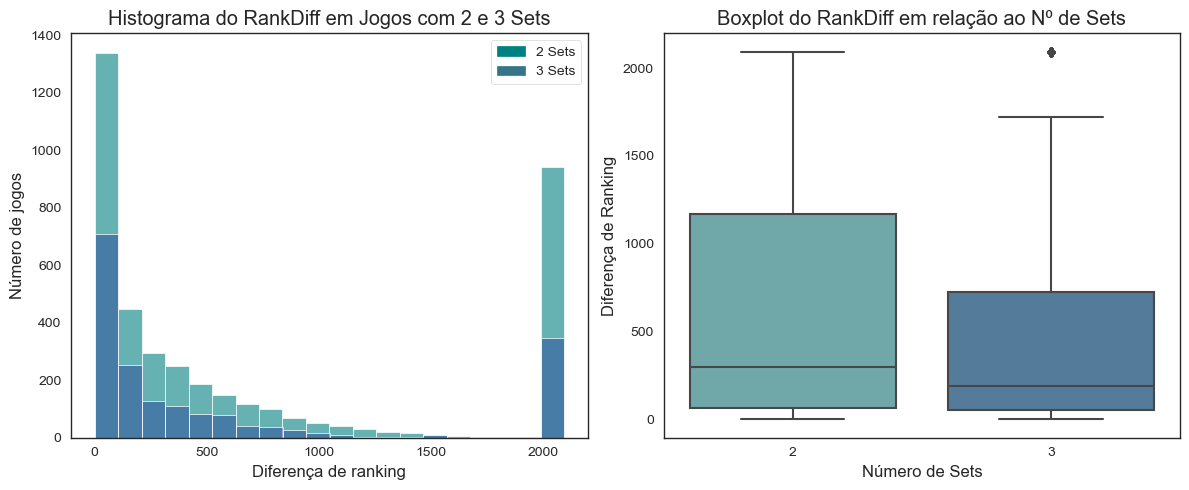

In [94]:
# Definir o estilo dos gráficos
sns.set_style("white")

# Cria uma figura e dois eixos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Histograma com 'RankDiff' nos jogos de 2 e 3 sets
sns.histplot(x='RankDiff', data=unique_games.loc[unique_games['N_Sets'] == 2], alpha=0.6, color='#008080', ax=ax1, bins=20)
sns.histplot(x='RankDiff', data=unique_games.loc[unique_games['N_Sets'] == 3], alpha=0.3, color='#00008b', ax=ax1)
# Definir a legenda
legend_labels = ['2 Sets', '3 Sets']
legend_colors = ['#008080', '#367588']
ax1.legend(labels=legend_labels, handles=[plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors])
ax1.set_title('Histograma do RankDiff em Jogos com 2 e 3 Sets')
ax1.set_xlabel('Diferença de ranking')
ax1.set_ylabel('Número de jogos')


# Boxplot
sns.boxplot(x=unique_games.loc[(unique_games['N_Sets'] < 4) & (unique_games['N_Sets'] > 1), 'N_Sets'], 
            y=unique_games.loc[(unique_games['N_Sets'] < 4) & (unique_games['N_Sets'] > 1), 'RankDiff'], 
            data=unique_games, ax=ax2, palette=['#66B2B2','#487CA6'])
ax2.set_title('Boxplot do RankDiff em relação ao Nº de Sets')
ax2.set_xlabel('Número de Sets')
ax2.set_ylabel('Diferença de Ranking')
plt.tight_layout()
plt.show()

> Concluímos que não fizemos uma má escolha em retirar esta variável, dado que mantém-se o problema de não haver correlação entre o **Rank dos Jogadores** e **Rank dos Oponentes** com o nosso *target* **`N_Sets`**.

----

# 💾 Guardar dataset

In [95]:
# Informação sobre o dataset (Tipo de dados e Número de observações não-nulas)
unique_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5994 entries, 0 to 5993
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   PlayerName             5994 non-null   object        
 1   Link_Player            5994 non-null   object        
 2   Born_Player            4967 non-null   object        
 3   Height_Player          4993 non-null   Int64         
 4   Hand_Player            5447 non-null   object        
 5   Birthdate_Player       5971 non-null   datetime64[ns]
 6   Age_Player             5987 non-null   Int64         
 7   Opponent               5994 non-null   object        
 8   Link_Opponent          5994 non-null   object        
 9   Born_Opponent          4501 non-null   object        
 10  Height_Opponent        4446 non-null   Int64         
 11  Hand_Opponent          5026 non-null   object        
 12  Birthdate_Opponent     5906 non-null   datetime64[ns]
 13  Age

In [96]:
# Nº de Valores Omissos no dataset 'unique_games'
print('Nº de Valores Omissos Geral:', unique_games.isna().any(axis=1).sum(), '(', round(unique_games.isna().any(axis=1).sum()/len(unique_games) * 100, 2),'% do dataset total)')

Nº de Valores Omissos Geral: 2727 ( 45.5 % do dataset total)


In [97]:
# Guardar o dataset com os jogos únicos
unique_games = unique_games.reindex(columns=['PlayerName', 'Link_Player', 'Born_Player', 'Height_Player', 'Hand_Player', 'Birthdate_Player', 'Age_Player', 'Opponent', 'Link_Opponent', 'Born_Opponent', 'Height_Opponent', 'Hand_Opponent', 'Birthdate_Opponent', 'Age_Opponent', 'RankDiff', 'Tournament', 'Tournament_Start_Date', 'Tournament_End_Date', 'Prize', 'Ground', 'GameRound', 'N_Sets'])
unique_games.to_csv('atp_suecia_unique.csv', index= False)

---